In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import pandas as pd

# Load the dataset
file_path1 = "/content/drive/MyDrive/Time Series Project/air traffic.csv"
file_path2 = "/content/drive/MyDrive/Time Series Project/U.S._Gulf_Coast_Kerosene-Type_Jet_Fuel_Spot_Price_FOB.csv"
file_path3 = "/content/drive/MyDrive/Time Series Project/US-Monthly-GDP-History-Data.xlsx"

air_traffic = pd.read_csv(file_path1)
jet_fuel_price = pd.read_csv(file_path2)
gdp_history = pd.read_excel(file_path3, sheet_name="Data")


In [162]:
print(air_traffic.info())
print(air_traffic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB
None
   Year  Month     Dom_Pax    Int_Pax         Pax  Dom_Flt Int_Flt      Flt  \
0  2003      1  43,032,45

In [165]:
air_traffic.dtypes

,0
Year,int64
Month,int64
Dom_Pax,object
Int_Pax,object
Pax,object
Dom_Flt,object
Int_Flt,object
Flt,object
Dom_RPM,object
Int_RPM,object


In [166]:
print(jet_fuel_price.info())
print(jet_fuel_price.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Month                                                                     418 non-null    object 
 1   U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon  418 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB
None
<bound method NDFrame.head of       Month  \
0    Jan-25   
1    Dec-24   
2    Nov-24   
3    Oct-24   
4    Sep-24   
..      ...   
413  Aug-90   
414  Jul-90   
415  Jun-90   
416  May-90   
417  Apr-90   

     U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon  
0                                                2.347                         
1                                                2.097  

In [167]:
print(gdp_history.info())
print(gdp_history.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year-Month                 396 non-null    object 
 1   Monthly Nominal GDP Index  396 non-null    float64
 2   Monthly Real GDP Index     396 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.4+ KB
None
   Year-Month  Monthly Nominal GDP Index  Monthly Real GDP Index
0  1992 - Jan                6315.717831            10177.761101
1  1992 - Feb                6356.509042            10222.923620
2  1992 - Mar                6417.079126            10308.007112
3  1992 - Apr                6443.257970            10314.281702
4  1992 - May                6433.800593            10293.476332


In [215]:
air_traffic['Pax'].min()

3013899

### Data Preprocessing & EDA for air_traffic

In [168]:
# Convert Year and Month into a datetime column
air_traffic['Date'] = pd.to_datetime(air_traffic['Year'].astype(str) + '-' + air_traffic['Month'].astype(str) + '-01')

# Set the Date column as the index (important for time series analysis)
air_traffic.set_index('Date', inplace=True)

# Drop the original Year and Month columns
air_traffic.drop(columns=['Year', 'Month'], inplace=True)

print(air_traffic.info())
print(air_traffic.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2003-01-01 to 2023-09-01
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dom_Pax  249 non-null    object 
 1   Int_Pax  249 non-null    object 
 2   Pax      249 non-null    object 
 3   Dom_Flt  249 non-null    object 
 4   Int_Flt  249 non-null    object 
 5   Flt      249 non-null    object 
 6   Dom_RPM  249 non-null    object 
 7   Int_RPM  249 non-null    object 
 8   RPM      249 non-null    object 
 9   Dom_ASM  249 non-null    object 
 10  Int_ASM  249 non-null    object 
 11  ASM      249 non-null    object 
 12  Dom_LF   249 non-null    float64
 13  Int_LF   249 non-null    float64
 14  LF       249 non-null    float64
dtypes: float64(3), object(12)
memory usage: 31.1+ KB
None
               Dom_Pax    Int_Pax         Pax  Dom_Flt Int_Flt      Flt  \
Date                                                                      
2003-01-01  43,032,45

In [169]:
# Change Object variables to numerical variables

def clean_numeric_column(column):
    return pd.to_numeric(column.astype(str).str.replace(',', ''), errors='coerce')

object_columns = air_traffic.select_dtypes(include=['object']).columns

for col in object_columns:
    air_traffic[col] = clean_numeric_column(air_traffic[col])

air_traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2003-01-01 to 2023-09-01
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dom_Pax  249 non-null    int64  
 1   Int_Pax  249 non-null    int64  
 2   Pax      249 non-null    int64  
 3   Dom_Flt  249 non-null    int64  
 4   Int_Flt  249 non-null    int64  
 5   Flt      249 non-null    int64  
 6   Dom_RPM  249 non-null    int64  
 7   Int_RPM  249 non-null    int64  
 8   RPM      249 non-null    int64  
 9   Dom_ASM  249 non-null    int64  
 10  Int_ASM  249 non-null    int64  
 11  ASM      249 non-null    int64  
 12  Dom_LF   249 non-null    float64
 13  Int_LF   249 non-null    float64
 14  LF       249 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 31.1 KB


In [171]:
air_traffic['Pax'].max()

87810772

In [ ]:
print(air_traffic.head())

             Dom_Pax  Int_Pax       Pax  Dom_Flt  Int_Flt     Flt   Dom_RPM  \
Date                                                                          
2003-01-01  43032450  4905830  47938280   785160    57667  842827  36211422   
2003-02-01  41166780  4245366  45412146   690351    51259  741610  34148439   
2003-03-01  49992700  5008613  55001313   797194    58926  856120  41774564   
2003-04-01  47033260  4345444  51378704   766260    55005  821265  39465980   
2003-05-01  49152352  4610834  53763186   789397    55265  844662  41001934   

             Int_RPM       RPM   Dom_ASM   Int_ASM       ASM  Dom_LF  Int_LF  \
Date                                                                           
2003-01-01  12885980  49097402  56191300  17968572  74159872   64.44   71.71   
2003-02-01  10715468  44863907  50088434  15587880  65676314   68.18   68.74   
2003-03-01  12567068  54341633  57592901  17753174  75346075   72.53   70.79   
2003-04-01  10370592  49836572  54639679  1552

In [ ]:
import pandas as pd

# Create a summary DataFrame for null values in each dataset
null_summary = pd.DataFrame({
    "Air Traffic": air_traffic.isnull().sum(),
    "Jet Fuel Price": jet_fuel_price.isnull().sum(),
    "GDP History": gdp_history.isnull().sum()
})

null_summary

# It seems that for all of the 3 dataframes, there is no null value in any column.

,Air Traffic,Jet Fuel Price,GDP History
ASM,0.0,NaN,NaN
Dom_ASM,0.0,NaN,NaN
Dom_Flt,0.0,NaN,NaN
Dom_LF,0.0,NaN,NaN
Dom_Pax,0.0,NaN,NaN
Dom_RPM,0.0,NaN,NaN
Flt,0.0,NaN,NaN
Int_ASM,0.0,NaN,NaN
Int_Flt,0.0,NaN,NaN
Int_LF,0.0,NaN,NaN


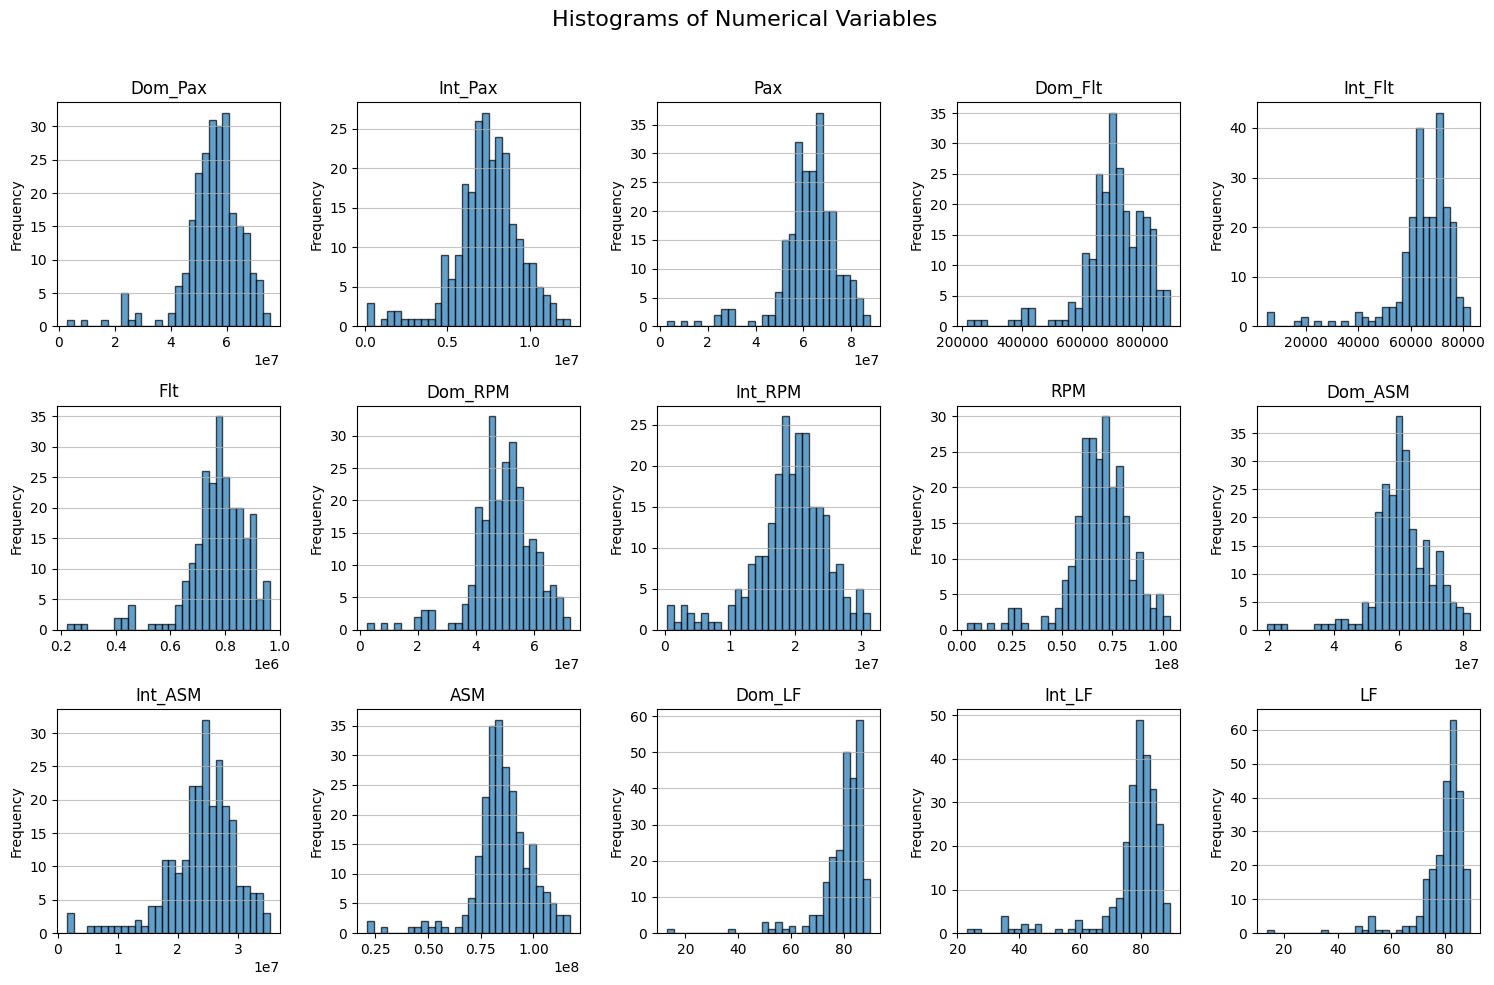

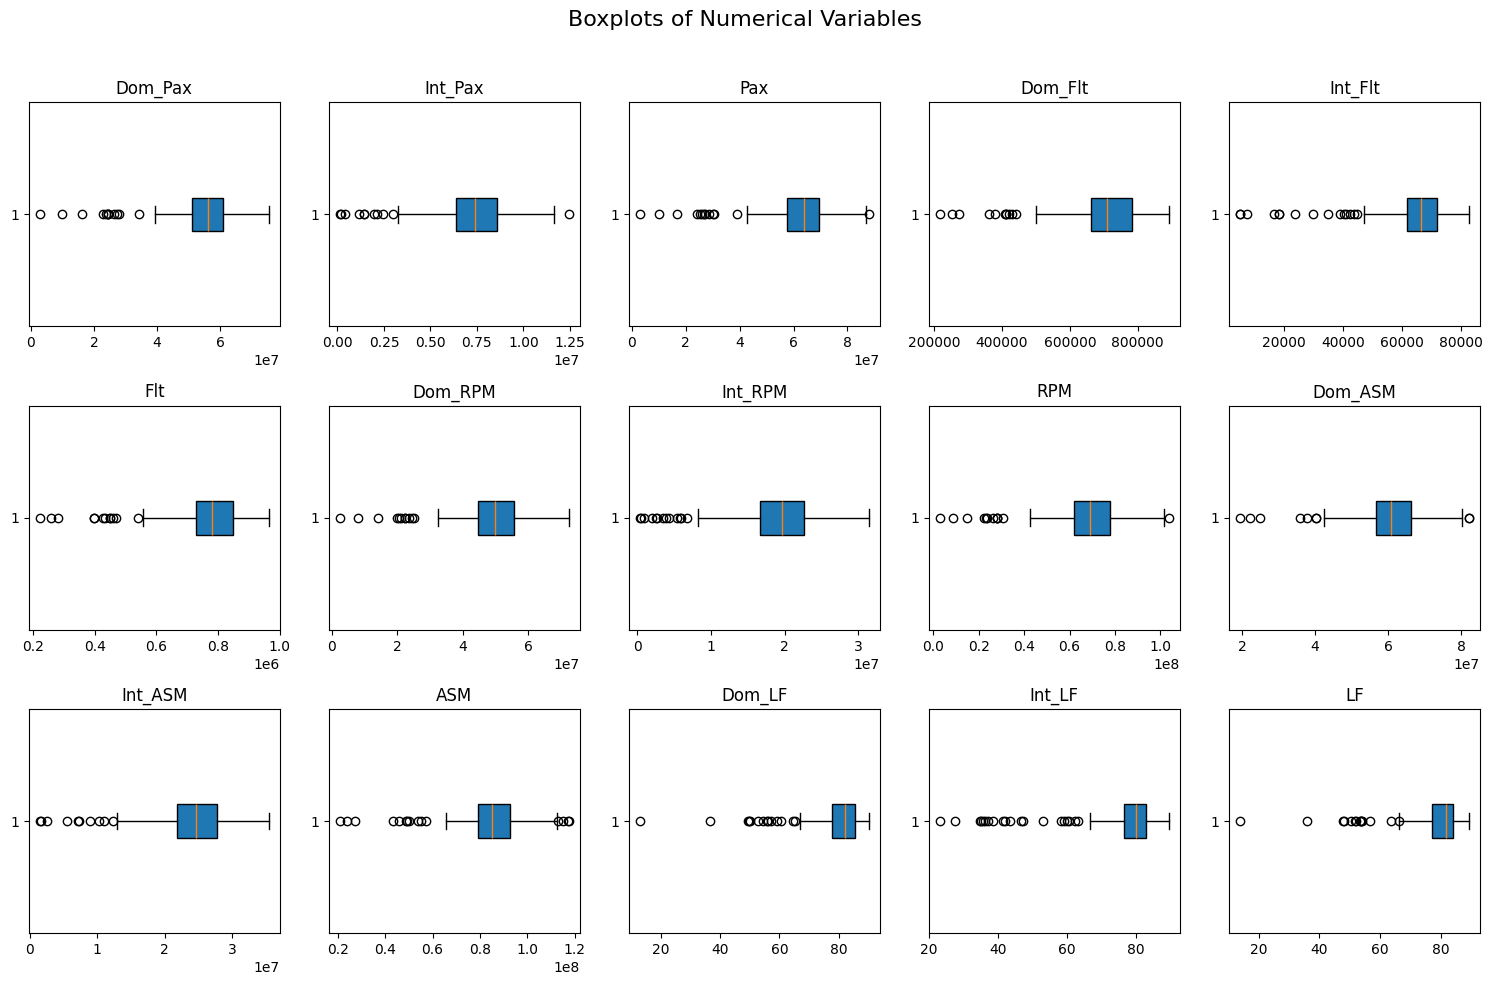

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distributions(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_cols = len(numeric_columns)

    rows, cols = 3, 5
    total_plots = rows * cols

    num_hist_plots = min(num_cols, total_plots)
    num_box_plots = min(num_cols, total_plots)

    # Plot Histograms
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    fig.suptitle('Histograms of Numerical Variables', fontsize=16)

    for i, col in enumerate(numeric_columns[:num_hist_plots]):
        ax = axes[i // cols, i % cols]
        ax.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        ax.set_title(col)
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.75)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Plot Boxplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    fig.suptitle('Boxplots of Numerical Variables', fontsize=16)

    for i, col in enumerate(numeric_columns[:num_box_plots]):
        ax = axes[i // cols, i % cols]
        ax.boxplot(df[col].dropna(), vert=False, patch_artist=True)
        ax.set_title(col)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_distributions(air_traffic)

In [ ]:
# Log transformation for skewed data

skewed_columns = ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt',
                  'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM']

for col in skewed_columns:
    air_traffic[col] = np.log1p(air_traffic[col])

In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_columns = ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt',
                  'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM',
                  'Dom_LF', 'Int_LF', 'LF']

air_traffic[scaled_columns] = scaler.fit_transform(air_traffic[scaled_columns])

In [ ]:
air_traffic.describe()

,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.895421,0.868667,0.889942,0.825377,0.899952,0.837798,0.877122,0.870092,0.873509,0.788663,0.863314,0.805651,0.869629,0.816940,0.869158
std,0.091624,0.111409,0.092783,0.132294,0.121024,0.129887,0.093564,0.124058,0.098250,0.120282,0.120363,0.118830,0.115267,0.164537,0.118121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.880257,0.852624,0.875282,0.789530,0.895202,0.808462,0.855529,0.857827,0.855425,0.741470,0.844863,0.771425,0.840770,0.803741,0.838003
50%,0.910095,0.885555,0.905729,0.839067,0.922696,0.854714,0.888989,0.895910,0.886169,0.792854,0.885048,0.812913,0.898010,0.856238,0.899615
75%,0.934649,0.917466,0.930422,0.907402,0.950331,0.913069,0.922032,0.927378,0.920599,0.851779,0.922412,0.862078,0.938598,0.901795,0.932678
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


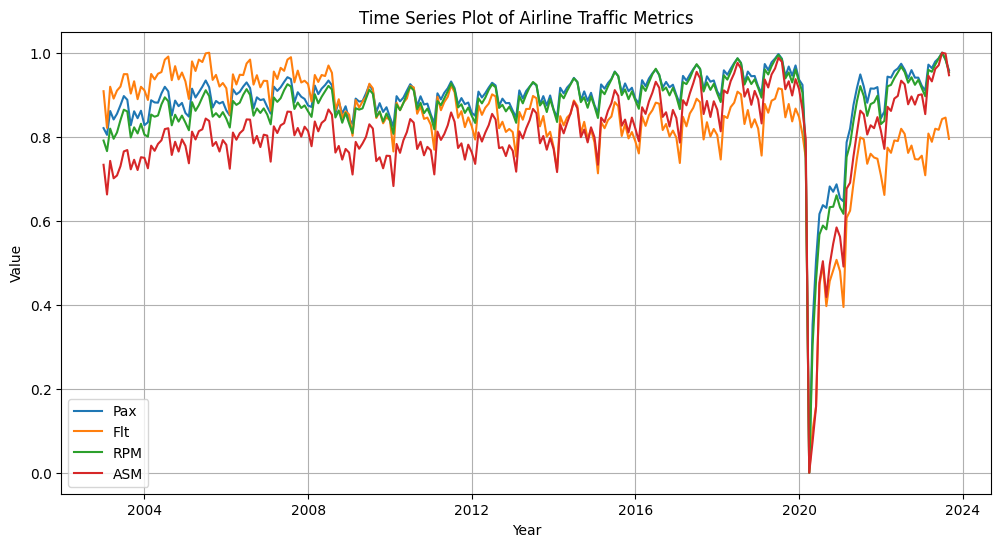

<Figure size 800x400 with 0 Axes>

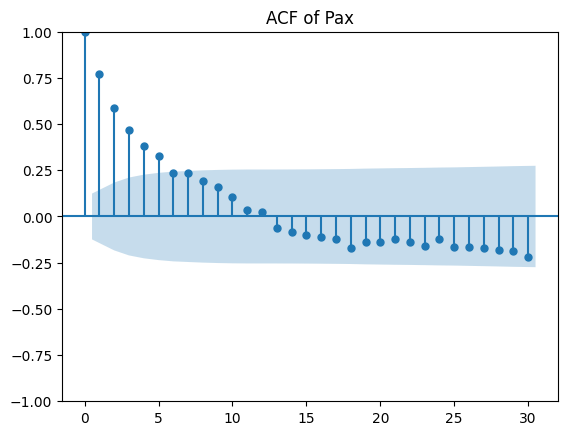

<Figure size 800x400 with 0 Axes>

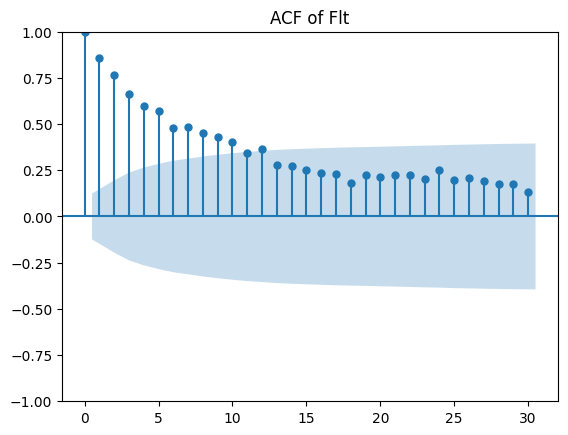

<Figure size 800x400 with 0 Axes>

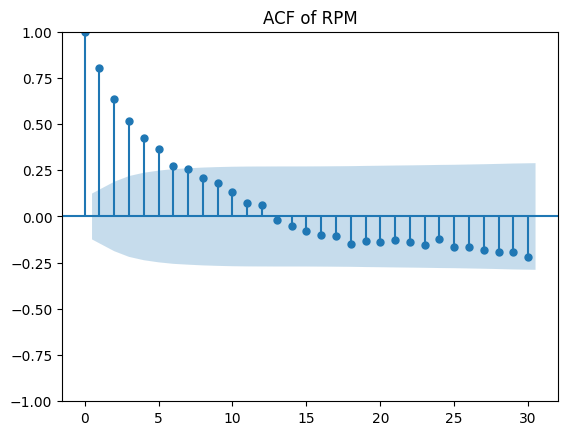

<Figure size 800x400 with 0 Axes>

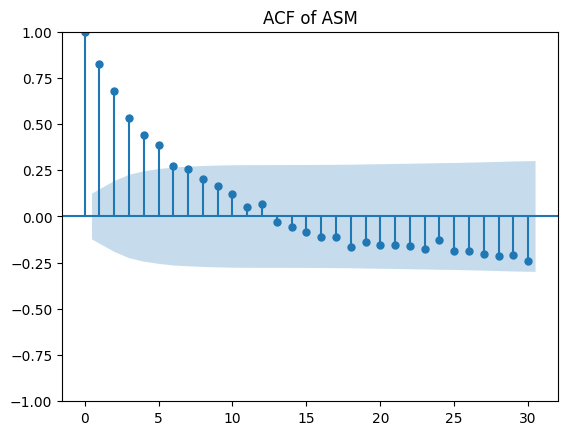

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


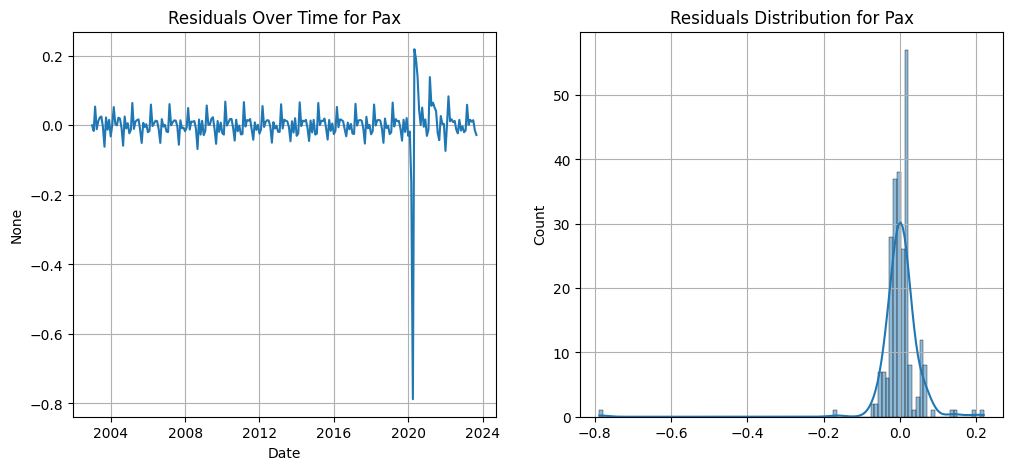

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


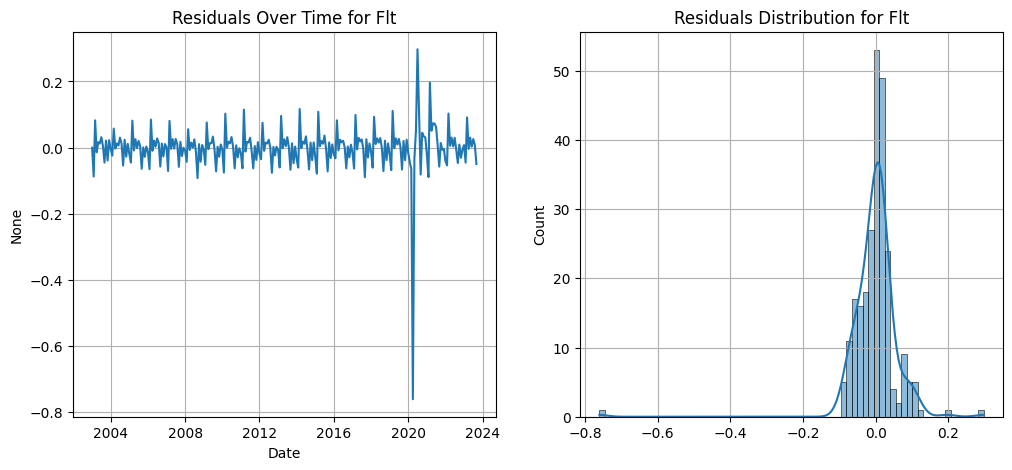

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


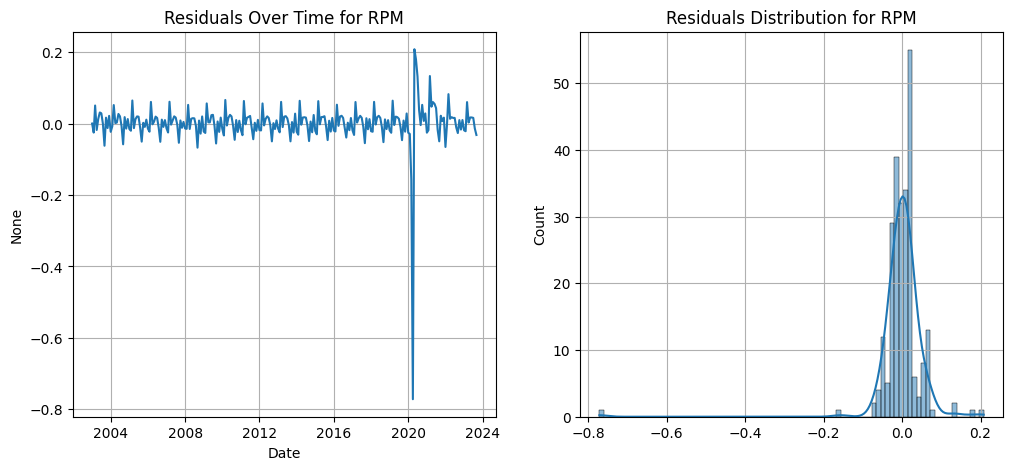

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


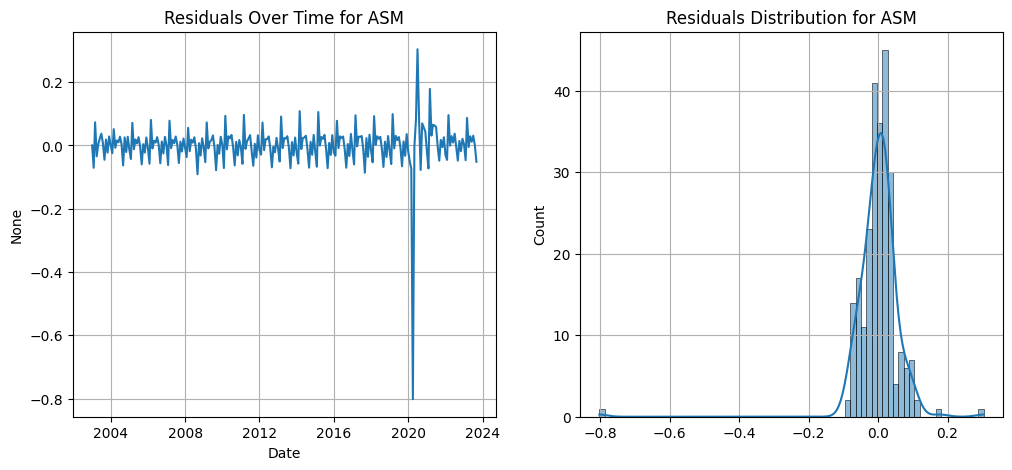

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define target variables
target_variables = ['Pax', 'Flt', 'RPM', 'ASM']  # Only Selected Total Columns Here

# Plot Time Series
plt.figure(figsize=(12, 6))
for var in target_variables:
    plt.plot(air_traffic.index, air_traffic[var], label=var)

plt.title("Time Series Plot of Airline Traffic Metrics")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# ACF Plot
for var in target_variables:
    plt.figure(figsize=(8, 4))
    plot_acf(air_traffic[var].dropna(), lags=30, title=f"ACF of {var}")
    plt.show()

# Residual Diagnostics
for var in target_variables:
    # Fit a simple time series model to extract residuals
    model = sm.tsa.SimpleExpSmoothing(air_traffic[var].dropna()).fit()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Residuals time series
    sns.lineplot(x=air_traffic.index, y=residuals, ax=ax[0])
    ax[0].set_title(f"Residuals Over Time for {var}")
    ax[0].grid()

    # Residuals distribution
    sns.histplot(residuals, kde=True, ax=ax[1])
    ax[1].set_title(f"Residuals Distribution for {var}")
    ax[1].grid()

    plt.show()


The first plot shows the time series of airline traffic metrics, including passengers (Pax), flights (Flt), revenue passenger miles (RPM), and available seat miles (ASM). The series follows a seasonal trend with a significant drop around 2020 due to COVID, followed by a recovery. The autocorrelation function (ACF) plots for each metric indicate strong autocorrelation at lower lags, suggesting that past values strongly influence future values. The residual plots show that while the model captures most patterns, there are deviations, particularly during the pandemic period, indicating external shocks affecting airline traffic.

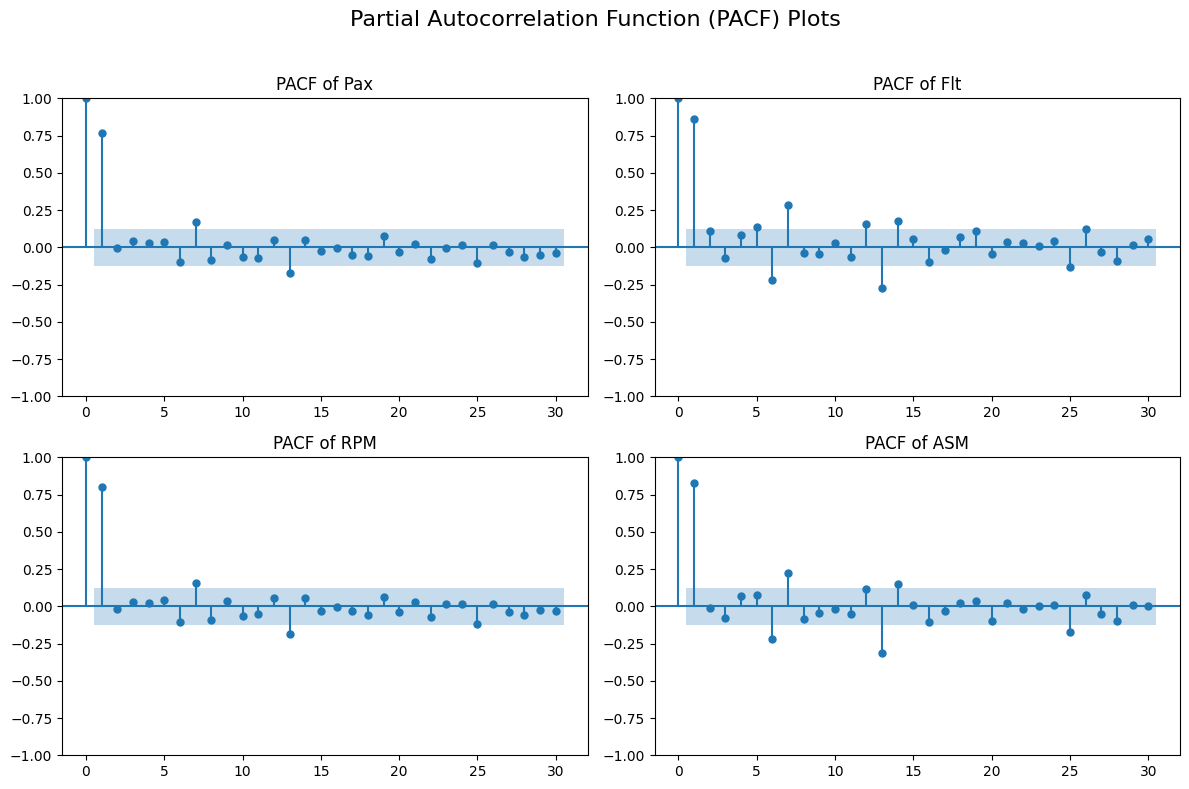

In [ ]:
from statsmodels.tsa.stattools import adfuller

# PACF Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Partial Autocorrelation Function (PACF) Plots", fontsize=16)

for i, var in enumerate(target_variables):
    row, col = divmod(i, 2)  # Get subplot row and column position
    sm.graphics.tsa.plot_pacf(air_traffic[var].dropna(), lags=30, method='ywm', ax=axes[row, col], title=f"PACF of {var}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

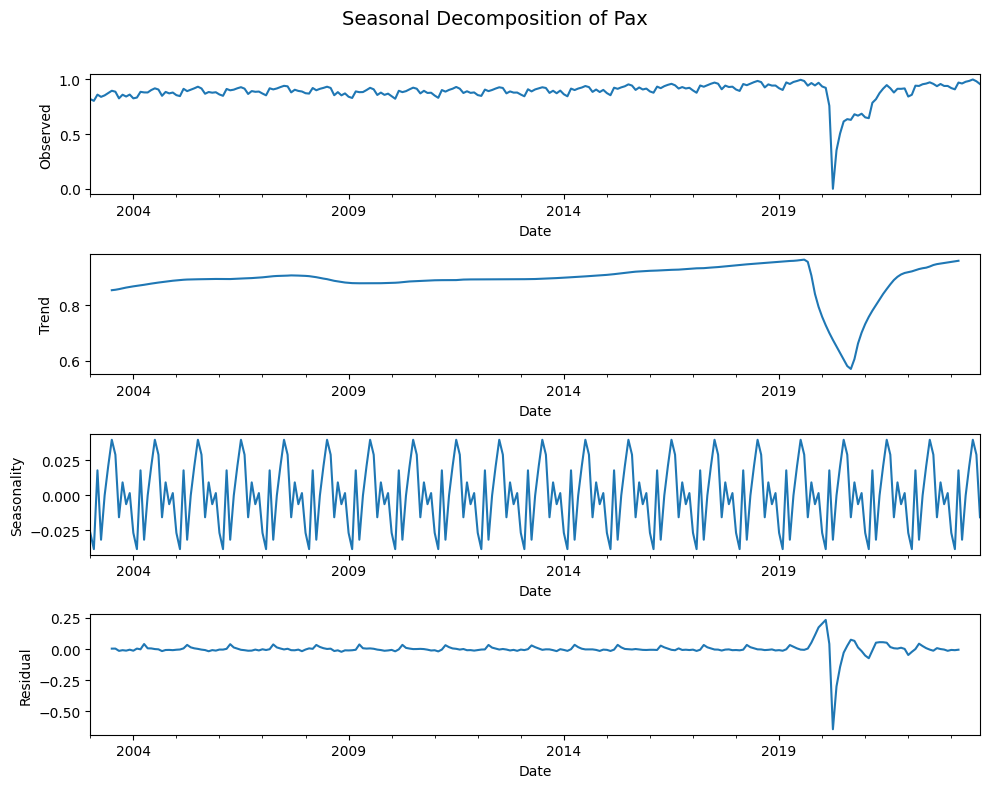

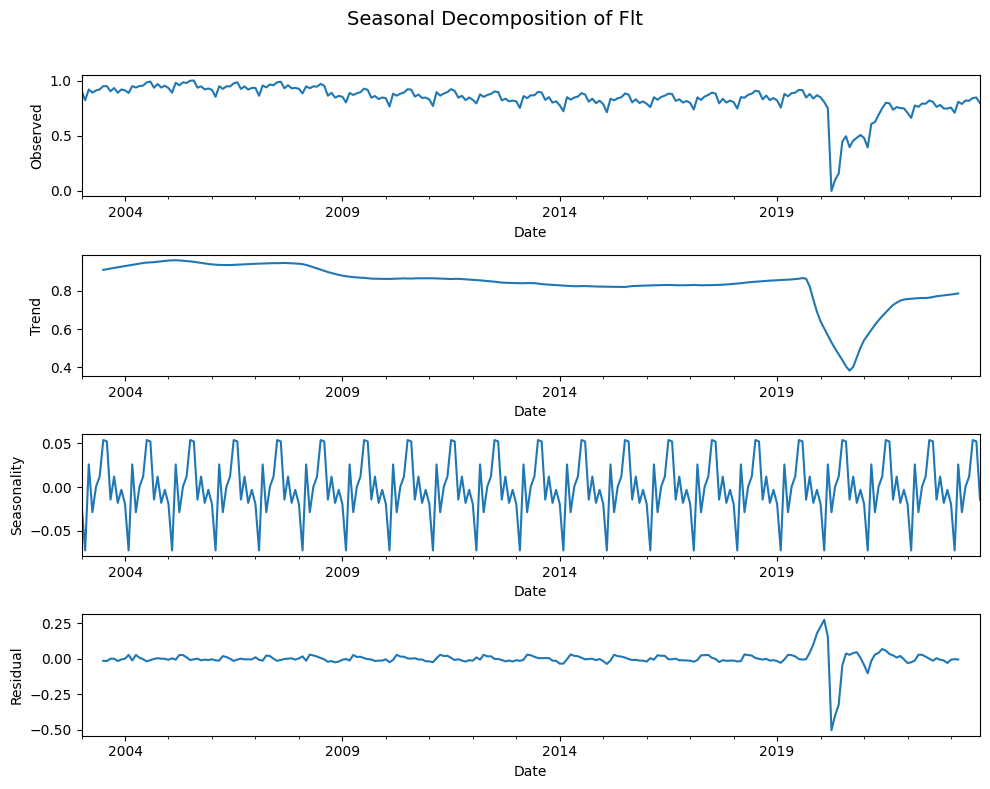

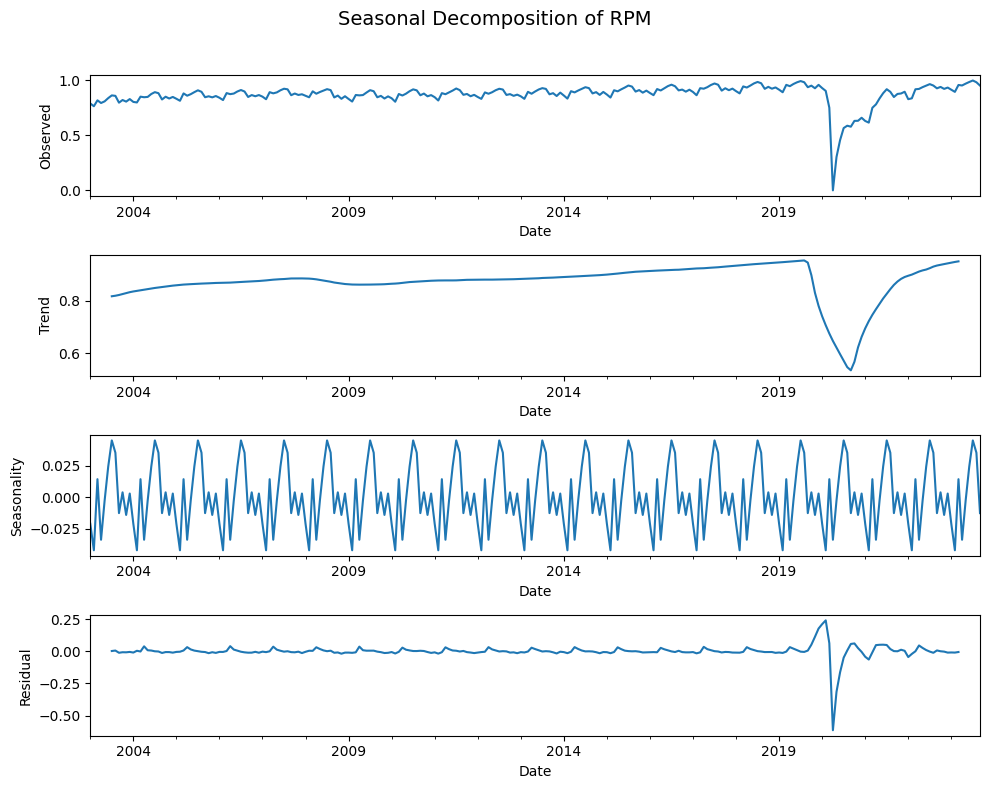

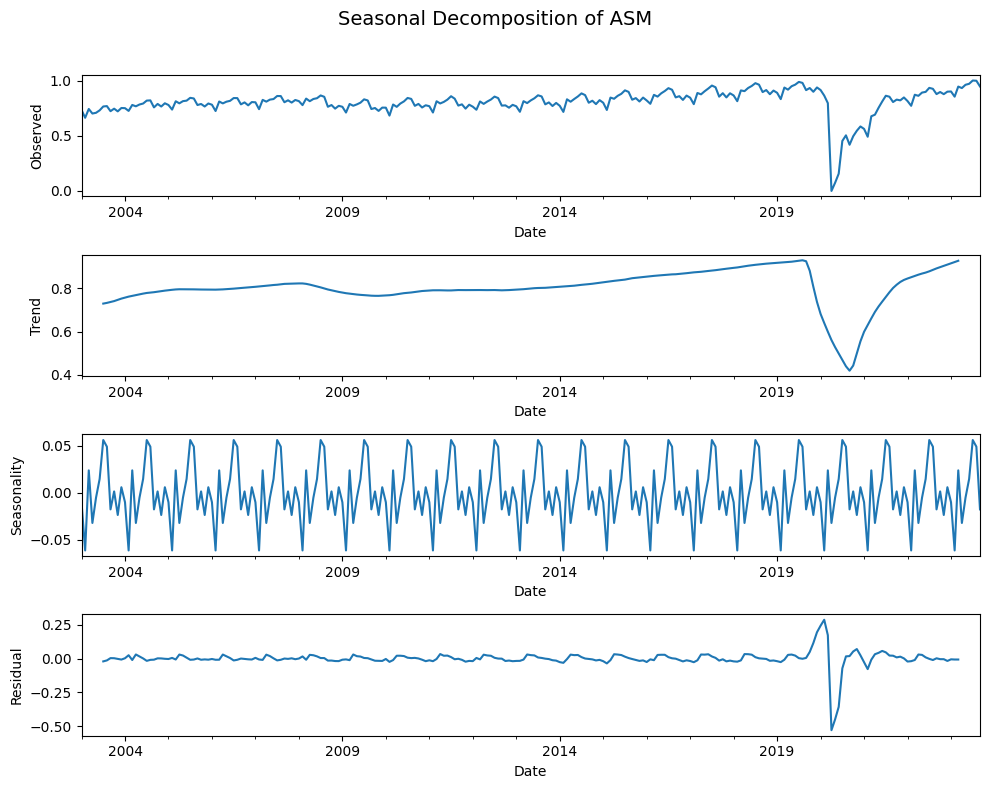

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
for var in ['Pax', 'Flt', 'RPM', 'ASM']:
    decomposition = seasonal_decompose(air_traffic[var].dropna(), model='additive', period=12)  # Assuming monthly data

    # Plot decomposition
    fig, axes = plt.subplots(4, 1, figsize=(10, 8))
    fig.suptitle(f"Seasonal Decomposition of {var}", fontsize=14)

    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel("Observed")

    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel("Trend")

    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel("Seasonality")

    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel("Residual")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


The PACF plots indicate that the airline traffic metrics have a strong immediate lag-1 correlation, suggesting that past values significantly influence current values. However, higher-order lags quickly diminish, indicating a short-term dependency structure. The seasonal decomposition plots reveal clear long-term trends and strong seasonality across all metrics, with a substantial drop around 2020 due to the pandemic, followed by a gradual recovery. The residual plots show mostly stable patterns.

In [ ]:
# Remove data from 2020 and 2021 for long-term trend

air_traffic_filtered = air_traffic.loc[~((air_traffic.index.year >= 2020) & (air_traffic.index.year <= 2021))]
print(air_traffic_filtered.head())

             Dom_Pax   Int_Pax       Pax   Dom_Flt   Int_Flt       Flt  \
Date                                                                     
2003-01-01  0.828347  0.793857  0.820499  0.910438  0.871604  0.908376   
2003-02-01  0.814774  0.761803  0.804444  0.819246  0.829628  0.821181   
2003-03-01  0.874255  0.798454  0.861259  0.921217  0.879301  0.919042   
2003-04-01  0.855569  0.766968  0.841053  0.893171  0.854763  0.890714   
2003-05-01  0.869064  0.780110  0.854507  0.914252  0.856443  0.909859   

             Dom_RPM   Int_RPM       RPM   Dom_ASM   Int_ASM       ASM  \
Date                                                                     
2003-01-01  0.793350  0.801216  0.790920  0.736973  0.784158  0.733187   
2003-02-01  0.775808  0.760013  0.765686  0.656956  0.738777  0.662510   
2003-03-01  0.836089  0.795618  0.819319  0.754120  0.780307  0.742419   
2003-04-01  0.819088  0.752706  0.795101  0.717485  0.737563  0.701000   
2003-05-01  0.830506  0.777249  0.810

### Preprocessing and EDA for gdp_history and jet_fuel_price

In [ ]:
# gdp_history
# Change Year-Month into time format

gdp_history["Year-Month"] = (
    gdp_history["Year-Month"]
    .astype(str)
    .str.replace("–", "-", regex=True)
    .str.replace(r"\s*-\s*", "-", regex=True)
    .str.strip()
)

gdp_history["Year-Month"] = pd.to_datetime(gdp_history["Year-Month"], format="%Y-%b", errors="coerce").dt.to_period("M")

print(gdp_history.head())

  Year-Month  Monthly Nominal GDP Index  Monthly Real GDP Index
0    1992-01                6315.717831            10177.761101
1    1992-02                6356.509042            10222.923620
2    1992-03                6417.079126            10308.007112
3    1992-04                6443.257970            10314.281702
4    1992-05                6433.800593            10293.476332


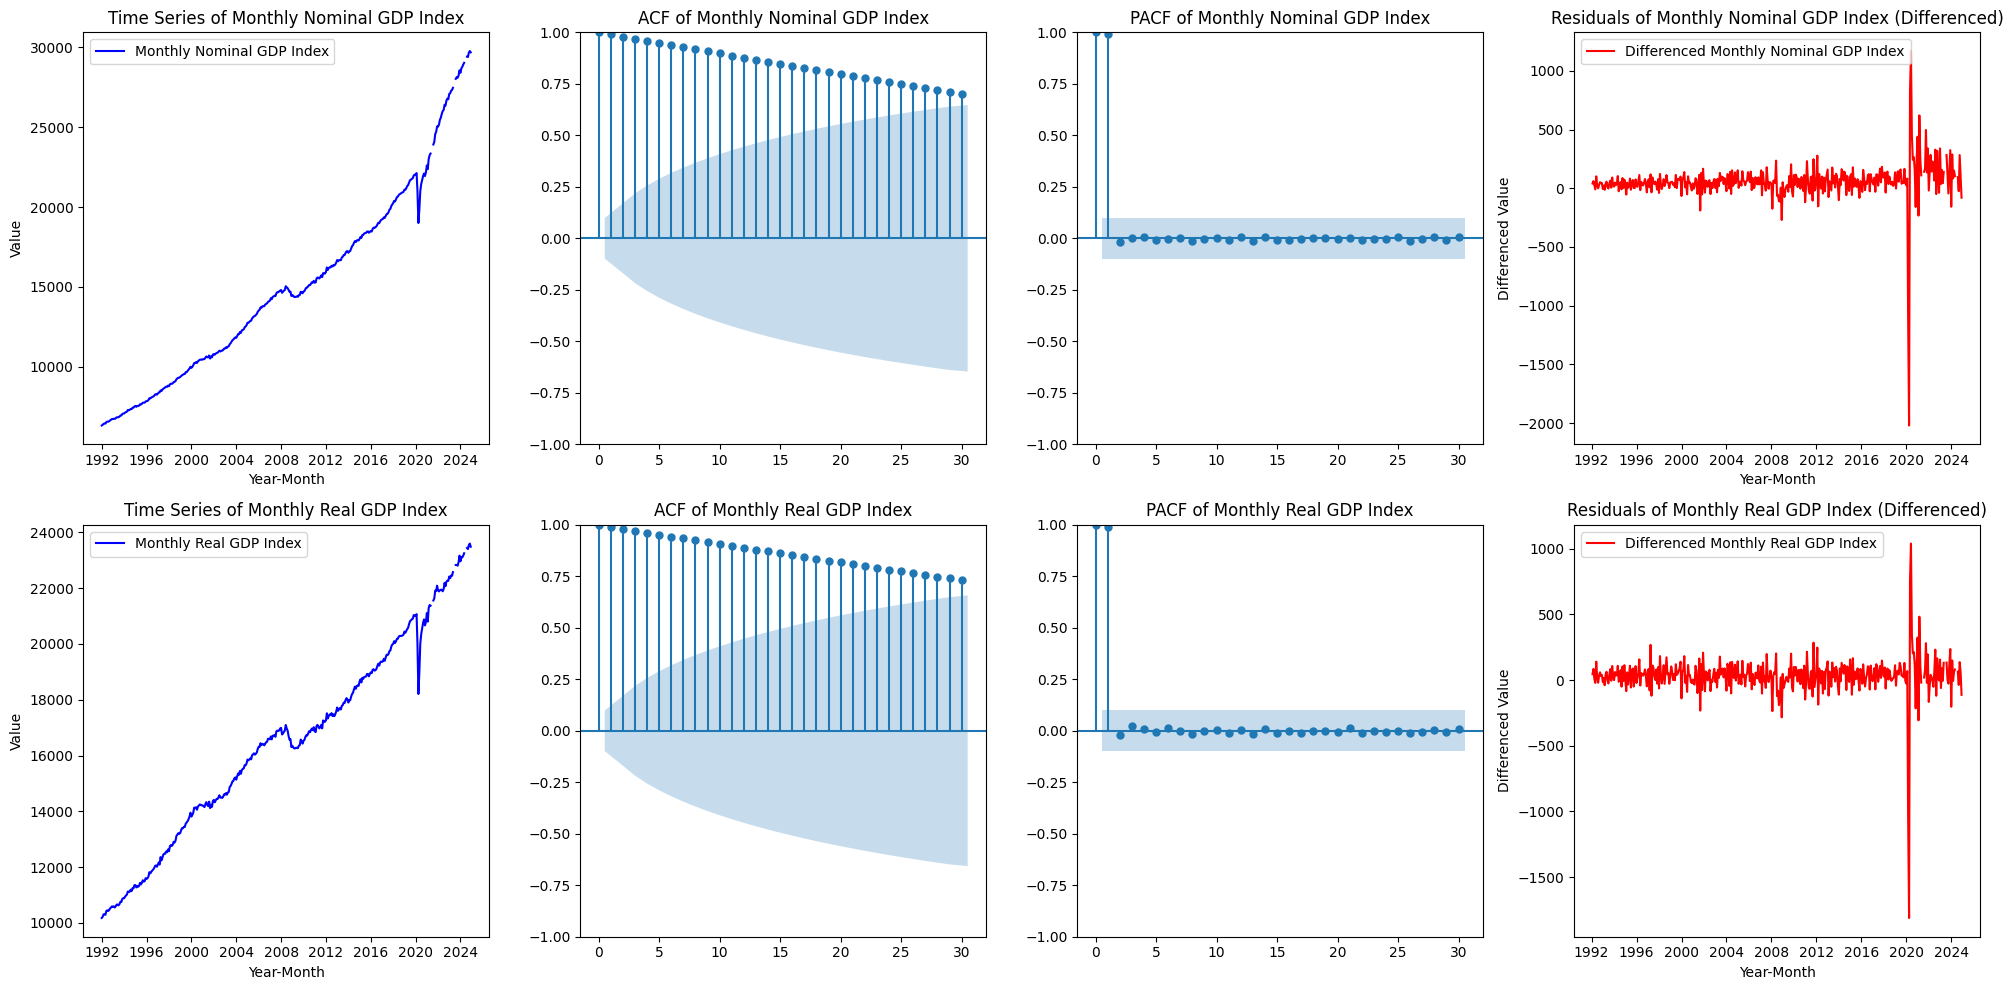

In [ ]:
gdp_history["Year-Month"] = gdp_history["Year-Month"].dt.to_timestamp()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

gdp_columns = ["Monthly Nominal GDP Index", "Monthly Real GDP Index"]

for i, col in enumerate(gdp_columns):
    # Time Series Plot
    axes[i, 0].plot(gdp_history["Year-Month"], gdp_history[col], label=col, color='b')
    axes[i, 0].set_title(f"Time Series of {col}")
    axes[i, 0].set_xlabel("Year-Month")
    axes[i, 0].set_ylabel("Value")
    axes[i, 0].legend()

    # ACF Plot
    sm.graphics.tsa.plot_acf(gdp_history[col].dropna(), lags=30, ax=axes[i, 1])
    axes[i, 1].set_title(f"ACF of {col}")

    # PACF Plot
    sm.graphics.tsa.plot_pacf(gdp_history[col].dropna(), lags=30, ax=axes[i, 2])
    axes[i, 2].set_title(f"PACF of {col}")

    # Residuals Plot (First-order differencing)
    diff_series = gdp_history[col].diff().dropna()
    axes[i, 3].plot(gdp_history["Year-Month"][1:], diff_series, label=f"Differenced {col}", color='r')
    axes[i, 3].set_title(f"Residuals of {col} (Differenced)")
    axes[i, 3].set_xlabel("Year-Month")
    axes[i, 3].set_ylabel("Differenced Value")
    axes[i, 3].legend()

plt.tight_layout()
plt.show()


The time series plots of Monthly Nominal GDP Index and Monthly Real GDP Index show strong upward trends, indicating non-stationarity. The ACF plots display slow decay, confirming persistent autocorrelation, while the PACF plots show a sharp drop after lag 1, suggesting a need for first-order differencing. The residual plots after differencing exhibit more stability but reveal large spikes around 2020. Data around 2020 will be removed for long-term trend forecasting.

In [ ]:
# jet_fuel_price
# Change Month into time format

jet_fuel_price["Month"] = pd.to_datetime(jet_fuel_price["Month"], format="%b-%y").dt.to_period("M")
print(jet_fuel_price.head())

     Month  \
0  2025-01   
1  2024-12   
2  2024-11   
3  2024-10   
4  2024-09   

   U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon  
0                                              2.347                         
1                                              2.097                         
2                                              2.065                         
3                                              2.068                         
4                                              1.982                         


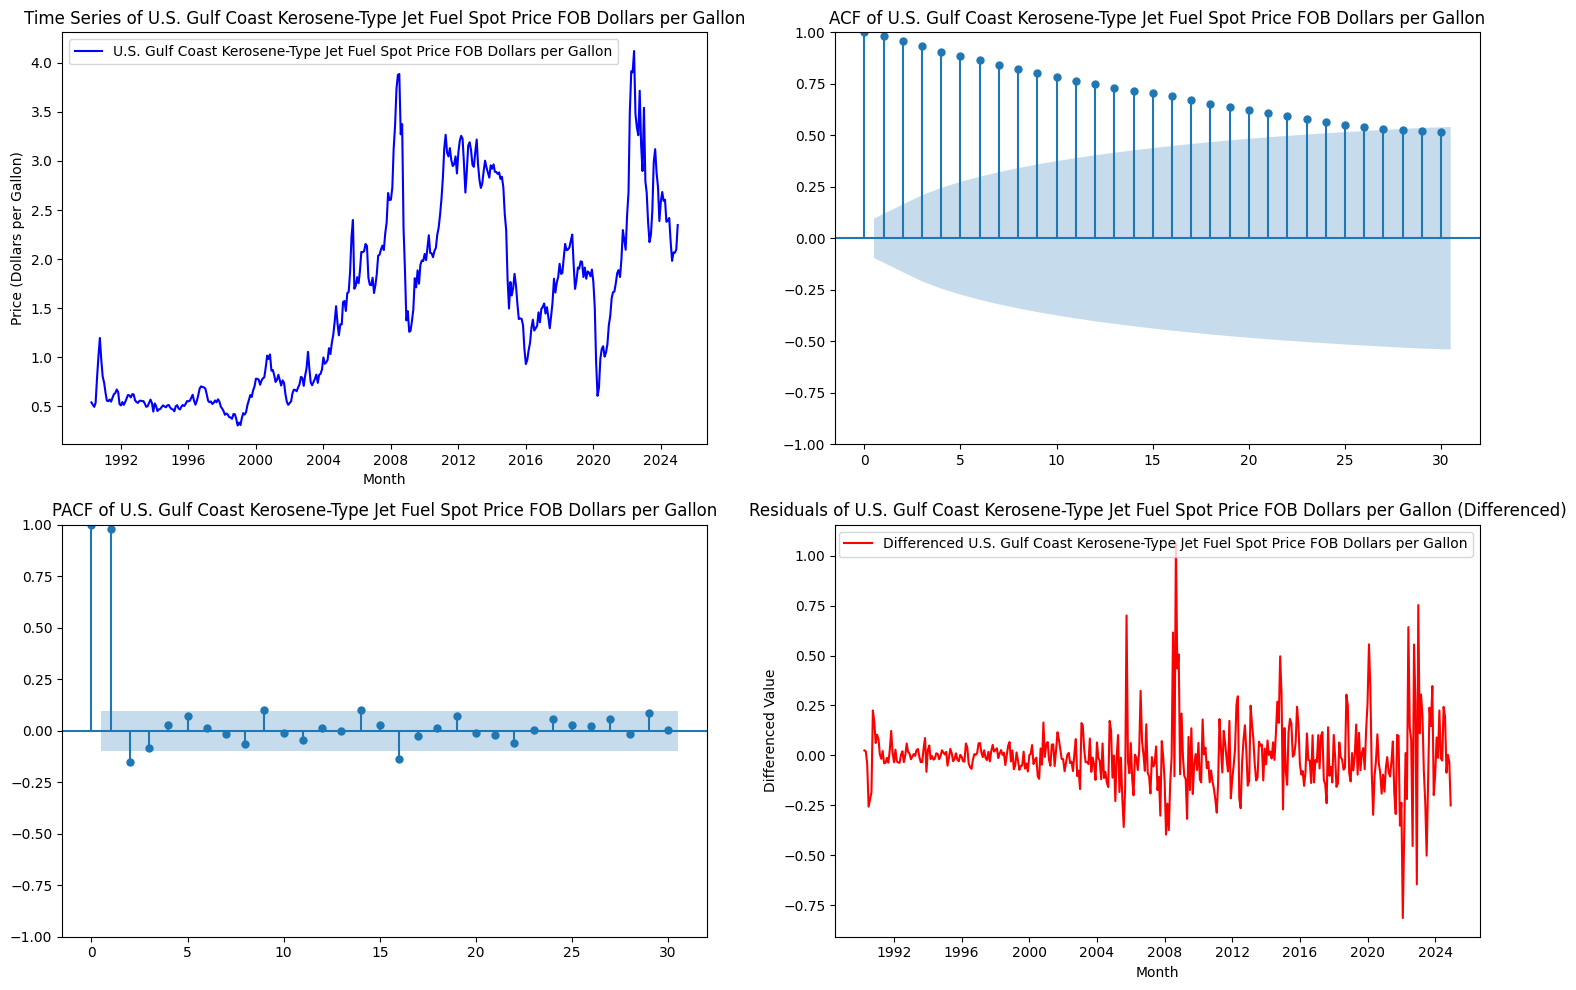

In [ ]:
jet_fuel_price["Month"] = jet_fuel_price["Month"].dt.to_timestamp()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

col = "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon"

# Time Series Plot
axes[0, 0].plot(jet_fuel_price["Month"], jet_fuel_price[col], label=col, color='b')
axes[0, 0].set_title(f"Time Series of {col}")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Price (Dollars per Gallon)")
axes[0, 0].legend()

# ACF Plot
sm.graphics.tsa.plot_acf(jet_fuel_price[col].dropna(), lags=30, ax=axes[0, 1])
axes[0, 1].set_title(f"ACF of {col}")

# PACF Plot
sm.graphics.tsa.plot_pacf(jet_fuel_price[col].dropna(), lags=30, ax=axes[1, 0])
axes[1, 0].set_title(f"PACF of {col}")

# Residuals Plot (First-order differencing)
diff_series = jet_fuel_price[col].diff().dropna()
axes[1, 1].plot(jet_fuel_price["Month"][1:], diff_series, label=f"Differenced {col}", color='r')
axes[1, 1].set_title(f"Residuals of {col} (Differenced)")
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Differenced Value")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

The time series plot of jet fuel prices shows strong volatility with clear upward trends and sharp fluctuations, particularly around 2008 and 2022, which is related to economic or geopolitical shocks. The ACF plot indicates a slow decay, confirming strong autocorrelation and trend persistence. The PACF plot has a significant lag-1 spike, suggesting that a first-order differencing (d=1) may help in making the series stationary. The residual plot after differencing shows reduced trend effects but retains volatility, I'll use box-cox transformation to stabilize volatility.

In [ ]:
from scipy.stats import boxcox

jet_fuel_price["Transformed_Price"], lambda_val = boxcox(
    jet_fuel_price["U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon"]
)

print(f"Optimal λ for Box-Cox: {lambda_val}")

Optimal λ for Box-Cox: 0.15120407176996906


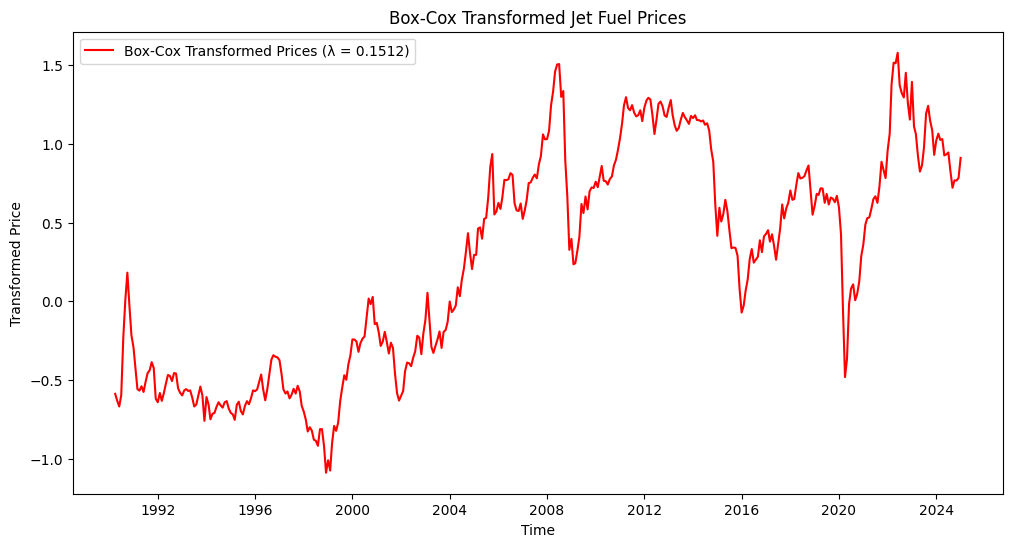

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

original_prices = jet_fuel_price["U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon"].dropna()

transformed_prices, lambda_val = boxcox(original_prices)

time_index = jet_fuel_price["Month"].dropna()

# Plot transformed data
plt.figure(figsize=(12, 6))
plt.plot(time_index, transformed_prices, label=f"Box-Cox Transformed Prices (λ = {lambda_val:.4f})", color="red")
plt.title("Box-Cox Transformed Jet Fuel Prices")
plt.ylabel("Transformed Price")
plt.xlabel("Time")
plt.legend()
plt.show()

The Box-Cox transformed jet fuel price series shows a more stabilized variance compared to the original series, but it still exhibits noticeable fluctuations, particularly during economic crises and oil price shocks. While the transformation reduces heteroscedasticity, there are still periods of high volatility, especially around 2008, 2014, and 2020. This suggests that additional modeling techniques, such as differencing or GARCH models, might be necessary to further address volatility in the series.

In [ ]:
jet_fuel_price.head()

,Month,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon,Transformed_Price
0,2025-01-01,2.347,0.910609
1,2024-12-01,2.097,0.783556
2,2024-11-01,2.065,0.766376
3,2024-10-01,2.068,0.767997
4,2024-09-01,1.982,0.720740


In [ ]:
air_traffic.tail()

,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
Date,,,,,,,,,,,,,,,
2023-05-01,0.983498,0.959543,0.978907,0.795213,0.950331,0.819013,0.976218,0.964832,0.971324,0.963621,0.967933,0.961351,0.945492,0.916428,0.947948
2023-06-01,0.988005,0.983570,0.986938,0.788772,0.966578,0.816535,0.985246,0.989113,0.986245,0.965737,0.982200,0.970276,0.976194,1.000000,0.991767
2023-07-01,1.000000,1.000000,1.000000,0.813669,0.987084,0.842057,1.000000,1.000000,1.000000,0.999903,1.000000,1.000000,0.976454,0.990647,0.989510
2023-08-01,0.983731,0.984100,0.983470,0.820406,0.975267,0.845561,0.981503,0.989524,0.983965,1.000000,0.996205,0.997983,0.907506,0.944486,0.928031
2023-09-01,0.963273,0.937849,0.958141,0.775812,0.910075,0.794892,0.953096,0.958672,0.953747,0.944829,0.960666,0.946362,0.890725,0.910243,0.906785


In [ ]:
gdp_history.tail()

,Year-Month,Monthly Nominal GDP Index,Monthly Real GDP Index
391,2024-08-01,29414.807797,23435.600363
392,2024-09-01,29389.581757,23398.764115
393,2024-10-01,29672.497957,23535.572316
394,2024-11-01,29766.631873,23594.464516
395,2024-12-01,29686.041989,23482.006841


### Concat three files

In [ ]:
gdp_history.rename(columns={'Year-Month': 'Date'}, inplace=True)

In [ ]:
jet_fuel_price.rename(columns={'Month': 'Date'}, inplace=True)

In [ ]:
air_traffic = air_traffic.reset_index()

In [ ]:
a = gdp_history.iloc[[376]]
print(a)

          Date  Monthly Nominal GDP Index  Monthly Real GDP Index
376 2023-05-01               27462.538988            22570.944497


In [ ]:
gdp_history.at[377, 'Date'] = '2023-06-01'

In [ ]:
gdp_history.at[378, 'Date'] = '2023-07-01'

In [ ]:
# same time range, using Date from 2003-01-01 to 2023-09-01
new_air_traffic = air_traffic[(air_traffic['Date'] >= '2003-01-01') & (air_traffic['Date'] <= '2023-09-01')]
new_jet_fuel_price = jet_fuel_price[(jet_fuel_price['Date'] >= '2003-01-01') & (jet_fuel_price['Date'] <= '2023-09-01')]
new_gdp_history = gdp_history[(gdp_history['Date'] >= '2003-01-01') & (gdp_history['Date'] <= '2023-09-01')]

In [ ]:
# merge the three files
data = pd.merge(new_air_traffic, new_jet_fuel_price, on='Date', how='inner')
data = pd.merge(data, new_gdp_history, on='Date', how='inner')

In [ ]:
data.tail()

,Date,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon,Transformed_Price,Monthly Nominal GDP Index,Monthly Real GDP Index
242,2023-05-01,0.983498,0.959543,0.978907,0.795213,0.950331,0.819013,0.976218,0.964832,0.971324,0.963621,0.967933,0.961351,0.945492,0.916428,0.947948,2.173,0.823482,27462.538988,22570.944497
243,2023-06-01,0.988005,0.983570,0.986938,0.788772,0.966578,0.816535,0.985246,0.989113,0.986245,0.965737,0.982200,0.970276,0.976194,1.000000,0.991767,2.250,0.862743,27575.422194,22613.014338
244,2023-07-01,1.000000,1.000000,1.000000,0.813669,0.987084,0.842057,1.000000,1.000000,1.000000,0.999903,1.000000,1.000000,0.976454,0.990647,0.989510,2.488,0.977277,27741.003055,22693.154686
245,2023-08-01,0.983731,0.984100,0.983470,0.820406,0.975267,0.845561,0.981503,0.989524,0.983965,1.000000,0.996205,0.997983,0.907506,0.944486,0.928031,2.989,1.190794,28024.431289,22826.789237
246,2023-09-01,0.963273,0.937849,0.958141,0.775812,0.910075,0.794892,0.953096,0.958672,0.953747,0.944829,0.960666,0.946362,0.890725,0.910243,0.906785,3.120,1.241575,28137.656657,22827.792163


In [ ]:
data.rename(columns={'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon': 'Fuel_Spot_Price'}, inplace=True)

In [ ]:
data.rename(columns={'Monthly Nominal GDP Index': 'Monthly_Nomial_GDP'}, inplace=True)

In [ ]:
data.rename(columns={'Monthly Real GDP Index': 'Monthly_Real_GDP'}, inplace=True)

In [ ]:
# Standardize column names
data.columns = data.columns.str.strip().str.lower()
data.rename(columns={'date': 'date'}, inplace=True)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.to_csv("new_merged_data.csv", index=False)

### Data Processing


In [ ]:
file_path_merged = "/content/drive/MyDrive/Time Series Project/new_merged_data(1).csv"
new_data = pd.read_csv(file_path_merged)

In [ ]:
new_data.head()

,date,dom_pax,int_pax,pax,dom_flt,int_flt,flt,dom_rpm,int_rpm,rpm,...,int_lf,lf,fuel_spot_price,transformed_price,monthly_nomial_gdp,monthly_real_gdp,pax_lag,flt_lag,lf_lag,rpm_lag
0,2003-01-01,0.828347,0.793857,0.820499,0.910438,0.871604,0.908376,0.793350,0.801216,0.790920,...,0.732539,0.695392,0.887,-0.118830,11135.823560,14595.873344,NaN,NaN,NaN,NaN
1,2003-02-01,0.814774,0.761803,0.804444,0.819246,0.829628,0.821181,0.775808,0.760013,0.765686,...,0.687736,0.723410,1.055,0.053758,11210.374001,14652.422580,0.820499,0.908376,0.695392,0.790920
2,2003-03-01,0.874255,0.798454,0.861259,0.921217,0.879301,0.919042,0.836089,0.795618,0.819319,...,0.718660,0.774001,0.893,-0.112206,11176.189440,14595.658491,0.804444,0.821181,0.723410,0.765686
3,2003-04-01,0.855569,0.766968,0.841053,0.893171,0.854763,0.890714,0.819088,0.752706,0.795101,...,0.658169,0.759395,0.743,-0.290487,11256.955779,14673.487907,0.861259,0.919042,0.774001,0.819319
4,2003-05-01,0.869064,0.780110,0.854507,0.914252,0.856443,0.909859,0.830506,0.777249,0.810081,...,0.767989,0.799894,0.714,-0.328437,11275.223148,14690.107595,0.841053,0.890714,0.759395,0.795101


In [ ]:
# Define the time range
train_start = "2003-01"
train_end = "2019-12"
test_start = "2023-04"
test_end = "2023-09"

In [ ]:
# Filter dataset
train_data = new_data[(new_data["date"] >= train_start) & (new_data["date"] <= train_end)]
test_data = new_data[(new_data["date"] >= test_start) & (new_data["date"] <= test_end)]


In [ ]:
# Forecast period: Simulate 6 months beyond test data
forecast_dates = pd.date_range(start=test_data["date"].max(), periods=7, freq="M")[1:]  # Next 6 months

<ipython-input-40-8f587c77d0f1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=test_data["date"].max(), periods=7, freq="M")[1:]  # Next 6 months


### XGBOOST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
target_variables = {
    "pax": ["pax_lag", "transformed_price", "monthly_real_gdp"],
    "flt": ["flt_lag", "transformed_price", "monthly_real_gdp"],
    "lf": ["lf_lag", "transformed_price", "monthly_real_gdp"],
    "rpm": ["rpm_lag", "transformed_price", "monthly_real_gdp"]
}

In [ ]:
forecast_results = {}

Training XGBoost model for pax...
pax - RMSE: 0.0560
pax - MAE: 0.0539


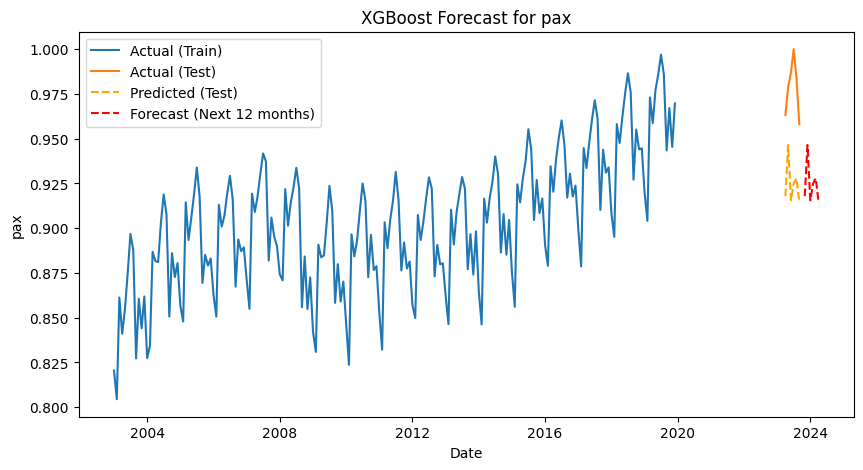

Training XGBoost model for flt...
flt - RMSE: 0.0459
flt - MAE: 0.0374


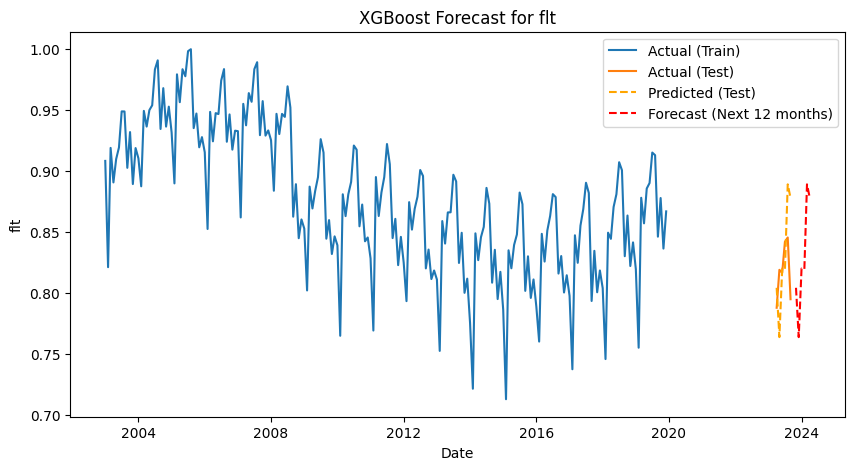

Training XGBoost model for lf...
lf - RMSE: 0.0599
lf - MAE: 0.0488


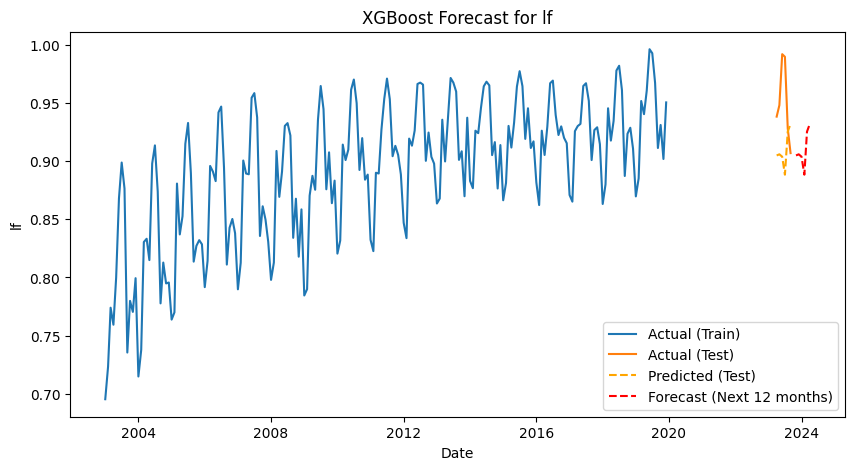

Training XGBoost model for rpm...
rpm - RMSE: 0.0627
rpm - MAE: 0.0597


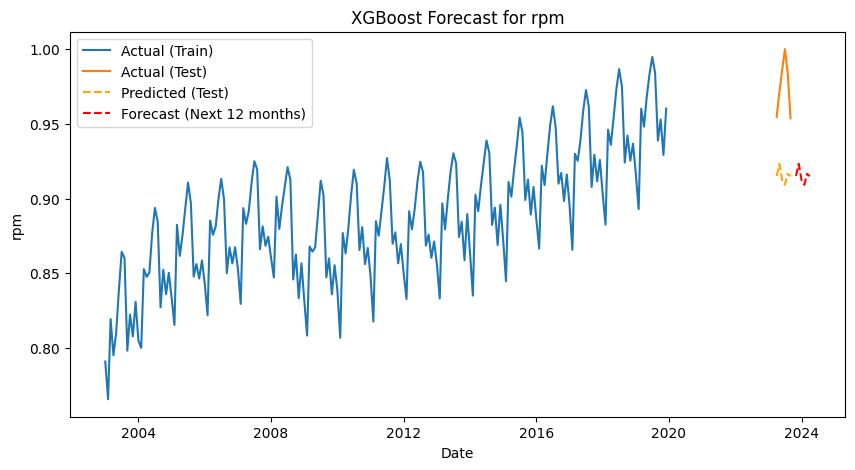

In [ ]:
for target, predictors in target_variables.items():
    print(f"Training XGBoost model for {target}...")

    # Extract training data
    X_train, y_train = train_data[predictors], train_data[target]
    X_test, y_test = test_data[predictors], test_data[target]

    # Train XGBoost model
    model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, objective="reg:squarederror")
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"{target} - RMSE: {rmse:.4f}")

    #Compute MAE
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f"{target} - MAE: {mae:.4f}")

    # Forecast for future period
    X_forecast = test_data[predictors].iloc[-6:].copy()
    X_forecast.index = forecast_dates  # Assign future dates

    forecast = model.predict(X_forecast)

    # Store forecast results
    forecast_results[target] = forecast

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(train_data["date"], train_data[target], label="Actual (Train)")
    plt.plot(test_data["date"], test_data[target], label="Actual (Test)")
    plt.plot(test_data["date"], y_pred_test, linestyle="dashed", color="orange", label="Predicted (Test)")
    plt.plot(forecast_dates, forecast, linestyle="dashed", color="red", label="Forecast (Next 12 months)")

    plt.title(f"XGBoost Forecast for {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.show()

In [ ]:
print(future_X)

             rpm_lag  transformed_price  monthly_real_gdp
2023-10-31  0.959161           0.923633      22439.253885
2023-11-30  0.954640           0.823482      22570.944497
2023-12-31  0.971324           0.862743      22613.014338
2024-01-31  0.986245           0.977277      22693.154686
2024-02-29  1.000000           1.190794      22826.789237
2024-03-31  0.983965           1.241575      22827.792163


### XGBoost for flt

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [174]:
file_path_marged = "/content/drive/MyDrive/Time Series Project/new_merged_data(1).csv"
flt_data = pd.read_csv(file_path_merged)

In [175]:
# Define the time range
train_start_flt = "2003-01"
train_end_flt = "2019-12"
test_start_flt = "2023-04"
test_end_flt = "2023-09-01"

In [176]:
# Create lagged variables
flt_data['pax_lag'] = flt_data['pax'].shift(1)
flt_data['flt_lag'] = flt_data['flt'].shift(1)
flt_data['lf_lag'] = flt_data['lf'].shift(1)
flt_data['rpm_lag'] = flt_data['rpm'].shift(1)

In [177]:
# Filter dataset
train_data_flt = flt_data[(flt_data["date"] >= train_start_flt) & (flt_data["date"] <= train_end_flt)]
test_data_flt = flt_data[(flt_data["date"] >= test_start_flt) & (flt_data["date"] <= test_end_flt)]


In [178]:
print(test_data_flt)

           date   dom_pax   int_pax       pax   dom_flt   int_flt       flt  \
241  2023-04-01  0.966521  0.951923  0.963264  0.761315  0.941066  0.787873   
242  2023-05-01  0.983498  0.959543  0.978907  0.795213  0.950331  0.819013   
243  2023-06-01  0.988005  0.983570  0.986938  0.788772  0.966578  0.816535   
244  2023-07-01  1.000000  1.000000  1.000000  0.813669  0.987084  0.842057   
245  2023-08-01  0.983731  0.984100  0.983470  0.820406  0.975267  0.845561   
246  2023-09-01  0.963273  0.937849  0.958141  0.775812  0.910075  0.794892   

      dom_rpm   int_rpm       rpm  ...    int_lf        lf  fuel_spot_price  \
241  0.960972  0.946637  0.954640  ...  0.893649  0.938122            2.374   
242  0.976218  0.964832  0.971324  ...  0.916428  0.947948            2.173   
243  0.985246  0.989113  0.986245  ...  1.000000  0.991767            2.250   
244  1.000000  1.000000  1.000000  ...  0.990647  0.989510            2.488   
245  0.981503  0.989524  0.983965  ...  0.944486  0

In [179]:
# Forecast period: Simulate 6 months beyond test data
forecast_dates_flt = pd.date_range(start=test_data_flt["date"].max(), periods=7, freq="M")[1:]  # Next 6 months

<ipython-input-179-f6f586a27cd6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_flt = pd.date_range(start=test_data_flt["date"].max(), periods=7, freq="M")[1:]  # Next 6 months


In [180]:
target_variables_flt = {
    "flt": ["flt_lag", "transformed_price", "monthly_real_gdp"]
}

In [182]:
forecast_results_flt = {}

In [183]:
for target, predictors in target_variables_flt.items():
    print(f"Training XGBoost model for {target}...")

    # Extract training data
    X_train, y_train = train_data_flt[predictors], train_data_flt[target]
    X_test, y_test = test_data_flt[predictors], test_data_flt[target]

    # Train XGBoost model
    model = XGBRegressor(n_estimators=300, learning_rate=0.01, max_depth=5, objective="reg:squarederror")
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"{target} - RMSE: {rmse:.4f}")

    #Compute MAE
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f"{target} - MAE: {mae:.4f}")


    # Forecast for future period
    X_forecast = test_data_flt[predictors].iloc[-6:].copy()
    print(X_forecast)
    X_forecast.index = forecast_dates_flt[:6]  # Assign future dates

    forecast = model.predict(X_forecast)

    # Store forecast results
    forecast_results_flt[target] = forecast
    print(forecast_results_flt)


Training XGBoost model for flt...
flt - RMSE: 0.0405
flt - MAE: 0.0345
      flt_lag  transformed_price  monthly_real_gdp
241  0.807538           0.923633      22439.253885
242  0.787873           0.823482      22570.944497
243  0.819013           0.862743      22613.014338
244  0.816535           0.977277      22693.154686
245  0.842057           1.190794      22826.789237
246  0.845561           1.241575      22827.792163
{'flt': array([0.8039803, 0.7674924, 0.8039803, 0.8039803, 0.8635982, 0.8655822],
      dtype=float32)}


### XGBoost lf

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [119]:
file_path_merged = "/content/drive/MyDrive/Time Series Project/new_merged_data(1).csv"
lf_data = pd.read_csv(file_path_merged)

In [120]:
# Define the time range
train_start_lf = "2003-01"
train_end_lf = "2019-12"
test_start_lf = "2023-04"
test_end_lf = "2023-09-01"

In [121]:
# Create lagged variables
lf_data['pax_lag'] = lf_data['pax'].shift(1)
lf_data['flt_lag'] = lf_data['flt'].shift(1)
lf_data['lf_lag'] = lf_data['lf'].shift(1)
lf_data['rpm_lag'] = lf_data['rpm'].shift(1)

In [122]:
# Filter dataset
train_data_lf = lf_data[(lf_data["date"] >= train_start_lf) & (lf_data["date"] <= train_end_lf)]
test_data_lf = lf_data[(lf_data["date"] >= test_start_lf) & (lf_data["date"] <= test_end_lf)]

In [123]:
# Forecast period: Simulate 6 months beyond test data
forecast_dates_lf = pd.date_range(start=test_data_lf["date"].max(), periods=7, freq="M")[1:]  # Next 6 months

<ipython-input-123-cb452f69b100>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_lf = pd.date_range(start=test_data_lf["date"].max(), periods=7, freq="M")[1:]  # Next 6 months


In [124]:
target_variables_lf = {
    "lf": ["lf_lag", "transformed_price", "monthly_real_gdp"]
}

In [127]:
for target, predictors in target_variables_lf.items():
    print(f"Training XGBoost model for {target}...")

    # Extract training data
    X_train, y_train = train_data_lf[predictors], train_data_lf[target]
    X_test, y_test = test_data_lf[predictors], test_data_lf[target]

    # Train XGBoost model
    model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=7, objective="reg:squarederror")
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"{target} - RMSE: {rmse:.4f}")

    #Compute MAE
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f"{target} - MAE: {mae:.4f}")


    # Forecast for future period
    X_forecast = test_data_lf[predictors].iloc[-6:].copy()
    print(X_forecast)
    X_forecast.index = forecast_dates_lf[:6]  # Assign future dates

    forecast = model.predict(X_forecast)

    # Store forecast results
    forecast_results[target] = forecast
    print(forecast_results)


Training XGBoost model for lf...
lf - RMSE: 0.0504
lf - MAE: 0.0408
       lf_lag  transformed_price  monthly_real_gdp
241  0.930421           0.923633      22439.253885
242  0.938122           0.823482      22570.944497
243  0.947948           0.862743      22613.014338
244  0.991767           0.977277      22693.154686
245  0.989510           1.190794      22826.789237
246  0.928031           1.241575      22827.792163
{'flt': array([0.8039803, 0.7674924, 0.8039803, 0.8039803, 0.8635982, 0.8655822],
      dtype=float32), 'lf': array([0.90976655, 0.9024593 , 0.9152266 , 0.910165  , 0.91408205,
       0.9056946 ], dtype=float32)}


### Prophet with COVID

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path_RNN = "/content/drive/MyDrive/Time Series Project/new_merged_data(1).csv"
new_data = pd.read_csv(file_path_RNN)

In [ ]:
new_data.head()

,date,dom_pax,int_pax,pax,dom_flt,int_flt,flt,dom_rpm,int_rpm,rpm,dom_asm,int_asm,asm,dom_lf,int_lf,lf,fuel_spot_price,transformed_price,monthly_nomial_gdp,monthly_real_gdp
0,2003-01-01,0.828347,0.793857,0.820499,0.910438,0.871604,0.908376,0.793350,0.801216,0.790920,0.736973,0.784158,0.733187,0.668011,0.732539,0.695392,0.887,-0.118830,11135.823560,14595.873344
1,2003-02-01,0.814774,0.761803,0.804444,0.819246,0.829628,0.821181,0.775808,0.760013,0.765686,0.656956,0.738777,0.662510,0.716664,0.687736,0.723410,1.055,0.053758,11210.374001,14652.422580
2,2003-03-01,0.874255,0.798454,0.861259,0.921217,0.879301,0.919042,0.836089,0.795618,0.819319,0.754120,0.780307,0.742419,0.773254,0.718660,0.774001,0.893,-0.112206,11176.189440,14595.658491
3,2003-04-01,0.855569,0.766968,0.841053,0.893171,0.854763,0.890714,0.819088,0.752706,0.795101,0.717485,0.737563,0.701000,0.769351,0.658169,0.759395,0.743,-0.290487,11256.955779,14673.487907
4,2003-05-01,0.869064,0.780110,0.854507,0.914252,0.856443,0.909859,0.830506,0.777249,0.810081,0.726473,0.739635,0.707688,0.793417,0.767989,0.799894,0.714,-0.328437,11275.223148,14690.107595


In [ ]:
# Create lagged variables
new_data['pax_lag'] = new_data['pax'].shift(1)
new_data['flt_lag'] = new_data['flt'].shift(1)
new_data['lf_lag'] = new_data['lf'].shift(1)
new_data['rpm_lag'] = new_data['rpm'].shift(1)

In [ ]:
new_data['date'] = pd.to_datetime(new_data['date'])

In [ ]:
# Define the target and independent variables for each pair
pairs = [
    {'target': 'pax', 'features': ['transformed_price', 'monthly_real_gdp']},
    {'target': 'flt', 'features': ['transformed_price', 'monthly_real_gdp']},
    {'target': 'lf', 'features': ['transformed_price', 'monthly_real_gdp']},
    {'target': 'rpm', 'features': ['transformed_price', 'monthly_real_gdp']}
]

In [ ]:
# Define the date ranges for training, testing, and prediction
train_start_date = '2003-01-01'
train_end_date = '2023-03-01'
test_start_date = '2023-04-01'
test_end_date = '2023-09-01'

In [ ]:
# COVID-19 period - adjust based on your data
covid_start_date = '2020-03-01'
covid_end_date = '2022-12-31'

In [ ]:
# Filter data for training and testing periods
train_data = new_data[(new_data['date'] >= train_start_date) & (new_data['date'] <= train_end_date)]
test_data = new_data[(new_data['date'] >= test_start_date) & (new_data['date'] <= test_end_date)]

In [ ]:
for pair in pairs:
    target_var = pair['target']
    features = pair['features']

    print(f"Training Prophet model for Target Variable: {target_var} with Features: {features}")

    # Prepare the data for Prophet
    train_data_prophet = train_data[['date', target_var] + features]
    train_data_prophet.columns = ['ds', 'y'] + features  # Prophet expects columns 'ds' for dates and 'y' for target variable

    # Ensure all columns are numeric
    for feature in features:
        train_data_prophet[feature] = pd.to_numeric(train_data_prophet[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
    train_data_prophet['y'] = pd.to_numeric(train_data_prophet['y'], errors='coerce')

    # Handle missing values in the training data (interpolate all features)
    for feature in features + ['y']:
        train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')  # Linear interpolation

    # Check for any remaining NaN values in the training data
    if train_data_prophet.isnull().any().any():
        print(f"Warning: There are still NaN values in the training data for {target_var}!")
        train_data_prophet = train_data_prophet.fillna(0)  # Fill NaNs with 0, or handle as needed

    # Initialize the Prophet model
    prophet_model = Prophet()

    # Add external regressors (independent features) to the model
    for feature in features:
        prophet_model.add_regressor(feature)

    # Manually add COVID-19 changepoints around the start of COVID-19 period
    changepoints = pd.to_datetime([covid_start_date, covid_end_date])  # Manually adding changepoints at the start and end of COVID

    # Set changepoint_prior_scale to allow flexibility in trend changes due to COVID
    prophet_model.changepoint_prior_scale = 0.1  # Allow more flexibility in detecting changes during COVID-19

    # Fit the Prophet model on the training data
    prophet_model.fit(train_data_prophet)

    # Create a future dataframe for forecasting (for the next 6 months)
    future_dates = prophet_model.make_future_dataframe(periods=6, freq='MS')  # Forecast for 6 months


    # Add the external regressor data for future dates (for the new period)
    future_data = new_data[['date'] + features]
    future_data = future_data[(future_data['date'] >= test_start_date) & (future_data['date'] <= test_end_date)]
    future_data = future_data.rename(columns={'date': 'ds'})  # Rename 'Date' to 'ds' to match Prophet format


    # Ensure all columns in future data are numeric and interpolate
    for feature in features:
        future_data[feature] = pd.to_numeric(future_data[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
    future_data = future_data.fillna(0)  # Fill any NaN values with 0

    # Handle missing values in the future data (interpolate)
    for feature in features:
        future_data[feature] = future_data[feature].interpolate(method='linear')  # Linear interpolation

    # Merge the future data with the future_dates dataframe
    future_dates = pd.merge(future_dates, future_data, on='ds', how='left')
    future_dates = future_dates.reset_index(drop = True)
    future_dates = future_dates.dropna()


    # Make predictions
    forecast = prophet_model.predict(future_dates)

    # Get the forecasted values (yhat) for the target variable (Pax) for the next 6 months
    future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # 'yhat' is the predicted value

    # Display the future predictions
    print(f"Future Predictions for {target_var}:\n", future_predictions.tail())

    # Now, calculate RMSE and MAE
    # We need the actual values from the test data
    actual_values = test_data[target_var].values

    # Find the corresponding predicted values (yhat) for the same dates in the forecast
    merged_forecast = forecast[['ds', 'yhat']].merge(test_data[['date', target_var]], left_on='ds', right_on='date', how='inner')

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(merged_forecast[target_var], merged_forecast['yhat']))
    print(f"RMSE for {target_var}: {rmse}")

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(merged_forecast[target_var], merged_forecast['yhat'])
    print(f"MAE for {target_var}: {mae}")

<ipython-input-34-6cf69f56c7d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = pd.to_numeric(train_data_prophet[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
<ipython-input-34-6cf69f56c7d6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet['y'] = pd.to_numeric(train_data_prophet['y'], errors='coerce')
<ipython-input-34-6cf69f56c7d6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Training Prophet model for Target Variable: pax with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for pax:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.911736    0.864734    0.963499
2 2023-06-01  0.923087    0.870163    0.975235
3 2023-07-01  0.950567    0.900499    1.005291
4 2023-08-01  0.961264    0.910020    1.013284
5 2023-09-01  0.917287    0.863229    0.970841
RMSE for pax: 0.057301050459114336
MAE for pax: 0.05402887867857925
Training Prophet model for Target Variable: flt with Features: ['transformed_price', 'monthly_real_gdp']


DEBUG:cmdstanpy:input tempfile: /tmp/tmply9fw75t/i9_gaub0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94690', 'data', 'file=/tmp/tmply9fw75t/91o4_v4o.json', 'init=/tmp/tmply9fw75t/i9_gaub0.json', 'output', 'file=/tmp/tmply9fw75t/prophet_modelgjwu_49l/prophet_model-20250311031426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:14:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:14:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-34-6cf69f56c7d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

Future Predictions for flt:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.723156    0.655903    0.791485
2 2023-06-01  0.729313    0.662962    0.801774
3 2023-07-01  0.763730    0.687663    0.831531
4 2023-08-01  0.780919    0.713258    0.853978
5 2023-09-01  0.723454    0.654977    0.794638
RMSE for flt: 0.08570199273956718
MAE for flt: 0.08439499377349541
Training Prophet model for Target Variable: lf with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for lf:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.827818    0.755063    0.906741
2 2023-06-01  0.865885    0.783990    0.938982
3 2023-07-01  0.902651    0.829805    0.978329
4 2023-08-01  0.911389    0.832214    0.990463
5 2023-09-01  0.835495    0.760210    0.911050
RMSE for lf: 0.10070305761768081
MAE for lf: 0.09228574931881882
Training Prophet model for Target Variable: rpm with Features: ['transformed_price', 'monthly_real_gdp']


03:14:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Future Predictions for rpm:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.880607    0.821619    0.937005
2 2023-06-01  0.898056    0.836569    0.953703
3 2023-07-01  0.927482    0.872637    0.985103
4 2023-08-01  0.940502    0.881528    1.001036
5 2023-09-01  0.894177    0.836147    0.953144
RMSE for rpm: 0.07899644271453675
MAE for rpm: 0.07634793969263204


### Prophet without COVID

In [ ]:
train_start1 = "2003-01"
train_end1 = "2019-12"
test_start1 = "2023-04"
test_end1 = "2023-09"

In [ ]:
# Filter data for training and testing periods
train_data1 = new_data[(new_data['date'] >= train_start_date) & (new_data['date'] <= train_end_date)]
test_data1 = new_data[(new_data['date'] >= test_start_date) & (new_data['date'] <= test_end_date)]

In [ ]:
for pair in pairs:
    target_var = pair['target']
    features = pair['features']

    print(f"Training Prophet model for Target Variable: {target_var} with Features: {features}")

    # Prepare the data for Prophet
    train_data_prophet = train_data[['date', target_var] + features]
    train_data_prophet.columns = ['ds', 'y'] + features  # Prophet expects columns 'ds' for dates and 'y' for target variable

    # Ensure all columns are numeric
    for feature in features:
        train_data_prophet[feature] = pd.to_numeric(train_data_prophet[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
    train_data_prophet['y'] = pd.to_numeric(train_data_prophet['y'], errors='coerce')

    # Handle missing values in the training data (interpolate all features)
    for feature in features + ['y']:
        train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')  # Linear interpolation

    # Check for any remaining NaN values in the training data
    if train_data_prophet.isnull().any().any():
        print(f"Warning: There are still NaN values in the training data for {target_var}!")
        train_data_prophet = train_data_prophet.fillna(0)  # Fill NaNs with 0, or handle as needed

    # Initialize the Prophet model
    prophet_model = Prophet()

    # Add external regressors (independent features) to the model
    for feature in features:
        prophet_model.add_regressor(feature)

    # Fit the Prophet model on the training data
    prophet_model.fit(train_data_prophet)

    # Create a future dataframe for forecasting (for the next 6 months)
    future_dates = prophet_model.make_future_dataframe(periods=6, freq='MS')  # Forecast for 6 months


    # Add the external regressor data for future dates (for the new period)
    future_data = new_data[['date'] + features]
    future_data = future_data[(future_data['date'] >= test_start_date) & (future_data['date'] <= test_end_date)]
    future_data = future_data.rename(columns={'date': 'ds'})  # Rename 'Date' to 'ds' to match Prophet format


    # Ensure all columns in future data are numeric and interpolate
    for feature in features:
        future_data[feature] = pd.to_numeric(future_data[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
    future_data = future_data.fillna(0)  # Fill any NaN values with 0

    # Handle missing values in the future data (interpolate)
    for feature in features:
        future_data[feature] = future_data[feature].interpolate(method='linear')  # Linear interpolation

    # Merge the future data with the future_dates dataframe
    future_dates = pd.merge(future_dates, future_data, on='ds', how='left')
    future_dates = future_dates.reset_index(drop = True)
    future_dates = future_dates.dropna()


    # Make predictions
    forecast = prophet_model.predict(future_dates)

    # Get the forecasted values (yhat) for the target variable (Pax) for the next 6 months
    future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # 'yhat' is the predicted value

    # Display the future predictions
    print(f"Future Predictions for {target_var}:\n", future_predictions.tail())

    # Now, calculate RMSE and MAE
    # We need the actual values from the test data
    actual_values = test_data[target_var].values

    # Find the corresponding predicted values (yhat) for the same dates in the forecast
    merged_forecast = forecast[['ds', 'yhat']].merge(test_data[['date', target_var]], left_on='ds', right_on='date', how='inner')

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(merged_forecast[target_var], merged_forecast['yhat']))
    print(f"RMSE for {target_var}: {rmse}")

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(merged_forecast[target_var], merged_forecast['yhat'])
    print(f"MAE for {target_var}: {mae}")

<ipython-input-39-c89be5ddf328>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = pd.to_numeric(train_data_prophet[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
<ipython-input-39-c89be5ddf328>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet['y'] = pd.to_numeric(train_data_prophet['y'], errors='coerce')
<ipython-input-39-c89be5ddf328>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Training Prophet model for Target Variable: pax with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for pax:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.888888    0.823253    0.958070
2 2023-06-01  0.899583    0.825474    0.967232
3 2023-07-01  0.927198    0.858108    0.995963
4 2023-08-01  0.940892    0.874660    1.012148
5 2023-09-01  0.899593    0.829347    0.967714
RMSE for pax: 0.07549582067757449
MAE for pax: 0.07338498013742849
Training Prophet model for Target Variable: flt with Features: ['transformed_price', 'monthly_real_gdp']


03:23:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-39-c89be5ddf328>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = pd.to_numeric(train_data_prophet[feature], errors='coerce')  # Convert to numeric, forcing errors to NaN
<ipython-input-39-c89be5ddf328>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet['y'] = pd.to_numeric(train_data_prophet['y'], errors='coerce')
<ipython-input-39-c89be5ddf328>:18

Future Predictions for flt:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.716324    0.637040    0.797303
2 2023-06-01  0.722364    0.636079    0.805578
3 2023-07-01  0.755859    0.676199    0.837427
4 2023-08-01  0.774991    0.695916    0.850136
5 2023-09-01  0.719716    0.643452    0.804598
RMSE for flt: 0.09006573340669548
MAE for flt: 0.08910269094700268
Training Prophet model for Target Variable: lf with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for lf:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.817516    0.725355    0.909597
2 2023-06-01  0.857532    0.764715    0.946692
3 2023-07-01  0.887186    0.790441    0.980079
4 2023-08-01  0.895854    0.805164    0.992459
5 2023-09-01  0.826106    0.735216    0.924493
RMSE for lf: 0.1090303789996395
MAE for lf: 0.10250817112836207
Training Prophet model for Target Variable: rpm with Features: ['transformed_price', 'monthly_real_gdp']


DEBUG:cmdstanpy:input tempfile: /tmp/tmply9fw75t/2lt43sah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmply9fw75t/nj9d0fpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99342', 'data', 'file=/tmp/tmply9fw75t/2lt43sah.json', 'init=/tmp/tmply9fw75t/nj9d0fpu.json', 'output', 'file=/tmp/tmply9fw75t/prophet_modelubp2hetk/prophet_model-20250311032323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:23:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:23:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Future Predictions for rpm:
           ds      yhat  yhat_lower  yhat_upper
1 2023-05-01  0.862672    0.789145    0.934621
2 2023-06-01  0.880009    0.804738    0.950182
3 2023-07-01  0.909702    0.841432    0.978169
4 2023-08-01  0.925519    0.851038    1.000032
5 2023-09-01  0.881771    0.812965    0.952397
RMSE for rpm: 0.09282465172464574
MAE for rpm: 0.09074968678619327


### Prophet without COVID (lf)

In [ ]:
external_file_path = "/content/drive/MyDrive/Time Series Project/external_forecast(1).csv"
ecternal_file = pd.read_csv(external_file_path)
external_data['date'] = pd.to_datetime(external_data['date'])

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
pairs = [
    {'target': 'lf', 'features': ['transformed_price', 'monthly_real_gdp']},  # Add features as needed
]


In [ ]:
# Define the training period
train_start1 = "2003-01"
train_end1 = "2019-12"
test_start1 = "2023-10"
test_end1 = "2024-03"


In [ ]:
# Assume you have your training data already
# Filter the data for training and testing
train_data = new_data[(new_data['date'] >= train_start1) & (new_data['date'] <= train_end1)]
test_data = new_data[(new_data['date'] >= test_start1) & (new_data['date'] <= test_end1)]


<ipython-input-118-8fea1f99dd33>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmply9fw75t/w0a77avb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmply9fw75t/xcnl2oyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38652', 'data', 'file=/tmp/tmply9fw75t/w0a77avb.json', 'in

Training Prophet model for Target Variable: lf with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for lf:
            ds      yhat  yhat_lower  yhat_upper
7  2024-05-01  0.955073    0.936369    0.975786
8  2024-06-01  1.005201    0.984835    1.024955
9  2024-07-01  1.011742    0.991131    1.031130
10 2024-08-01  0.988701    0.969336    1.007320
11 2024-09-01  0.922522    0.903645    0.943146
ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object


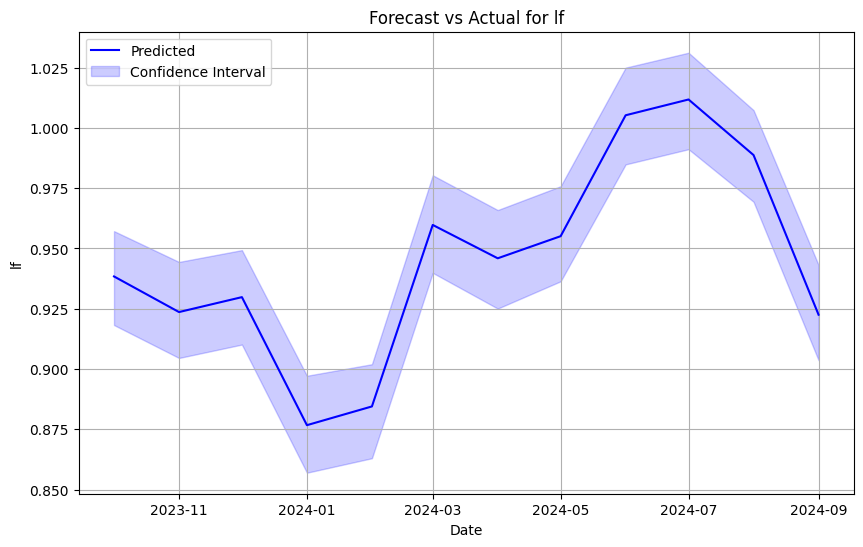

In [ ]:
for pair in pairs:
    target_var = pair['target']
    features = pair['features']

    print(f"Training Prophet model for Target Variable: {target_var} with Features: {features}")

    # Prepare the data for Prophet
    train_data_prophet = train_data[['date', target_var] + features]
    train_data_prophet.columns = ['ds', 'y'] + features  # Prophet expects 'ds' for dates and 'y' for target variable

    # Handle missing values by linear interpolation
    for feature in features + ['y']:
        train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')

    # Initialize and train the Prophet model
    prophet_model = Prophet()
    for feature in features:
        prophet_model.add_regressor(feature)

    prophet_model.fit(train_data_prophet)

    # Use the external forecast data as future data
    future_dates_df = external_data[['date', 'transformed_price', 'monthly_real_gdp']]
    future_dates_df = future_dates_df.rename(columns={'date': 'ds'})  # Rename 'date' to 'ds' to match Prophet format

    # Handle missing values in the future data (interpolate)
    for feature in features:
        future_dates_df[feature] = future_dates_df[feature].interpolate(method='linear')  # Linear interpolation

    # Make predictions using the Prophet model
    forecast = prophet_model.predict(future_dates_df)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast['ds'] = forecast['ds'].dt.tz_localize(None)

    # Get forecasted values (yhat) for the next period
    future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Display the future predictions
    print(f"Future Predictions for {target_var}:\n", future_predictions.tail())
    print(future_predictions.dtypes)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')

    plt.title(f"Forecast vs Actual for {target_var}")
    plt.xlabel("Date")
    plt.ylabel(target_var)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

### Prophet (pax)

In [145]:
file_path_RNN = "/content/drive/MyDrive/Time Series Project/new_merged_data(1).csv"
new_data = pd.read_csv(file_path_RNN)

In [146]:
# Create lagged variables
new_data['pax_lag'] = new_data['pax'].shift(1)
new_data['flt_lag'] = new_data['flt'].shift(1)
new_data['lf_lag'] = new_data['lf'].shift(1)
new_data['rpm_lag'] = new_data['rpm'].shift(1)

In [147]:
new_data['date'] = pd.to_datetime(new_data['date'])

In [148]:
external_file_path = "/content/drive/MyDrive/Time Series Project/external_forecast(1).csv"
external_data = pd.read_csv(external_file_path)
external_data['date'] = pd.to_datetime(external_data['date'])

In [149]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [150]:
pairs = [
    {'target': 'pax', 'features': ['transformed_price', 'monthly_real_gdp']},  # Add features as needed
]


In [151]:
# Define the training period
train_start1 = "2003-01"
train_end1 = "2019-12"
test_start1 = "2023-10"
test_end1 = "2024-03"

In [152]:
# Assume you have your training data already
# Filter the data for training and testing
train_data = new_data[(new_data['date'] >= train_start1) & (new_data['date'] <= train_end1)]
test_data = new_data[(new_data['date'] >= test_start1) & (new_data['date'] <= test_end1)]


<ipython-input-154-bb3d33105930>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnf0xzwqx/krbx5qhh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnf0xzwqx/pvju1lob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21192', 'data', 'file=/tmp/tmpnf0xzwqx/krbx5qhh.json', 'in

Training Prophet model for Target Variable: pax with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for pax:
            ds      yhat  yhat_lower  yhat_upper
7  2024-05-01  1.031978    1.025851    1.037657
8  2024-06-01  1.048007    1.041124    1.053816
9  2024-07-01  1.061058    1.054169    1.067137
10 2024-08-01  1.050391    1.043791    1.056584
11 2024-09-01  1.000434    0.993634    1.007378
ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object


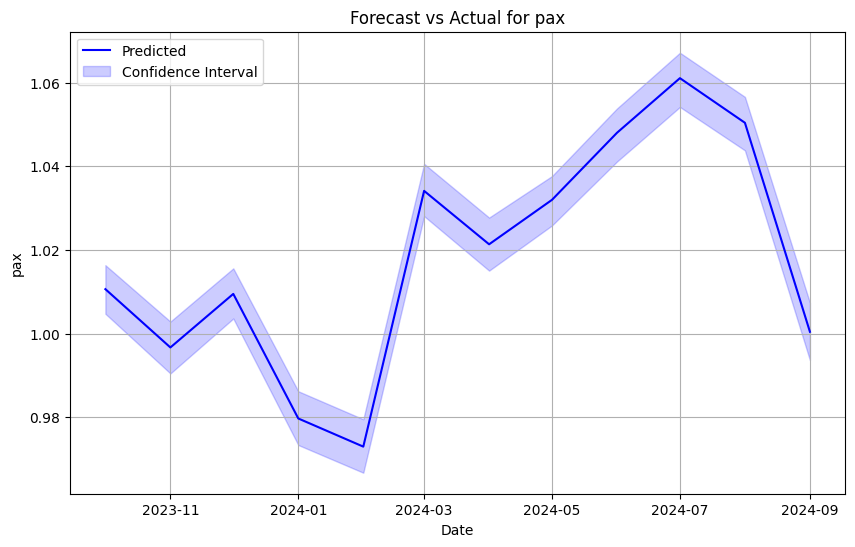

In [154]:
for pair in pairs:
    target_var = pair['target']
    features = pair['features']

    print(f"Training Prophet model for Target Variable: {target_var} with Features: {features}")


    # Prepare the data for Prophet
    train_data_prophet = train_data[['date', target_var] + features]
    train_data_prophet.columns = ['ds', 'y'] + features  # Prophet expects 'ds' for dates and 'y' for target variable

    # Handle missing values by linear interpolation
    for feature in features + ['y']:
        train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')

    # Initialize and train the Prophet model
    prophet_model = Prophet()
    for feature in features:
        prophet_model.add_regressor(feature)

    prophet_model.fit(train_data_prophet)

    # Use the external forecast data as future data
    future_dates_df = pax_data[['date', 'transformed_price', 'monthly_real_gdp']]
    future_dates_df = future_dates_df.rename(columns={'date': 'ds'})  # Rename 'date' to 'ds' to match Prophet format

    # Handle missing values in the future data (interpolate)
    for feature in features:
        future_dates_df[feature] = future_dates_df[feature].interpolate(method='linear')  # Linear interpolation

    # Make predictions using the Prophet model
    forecast = prophet_model.predict(future_dates_df)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast['ds'] = forecast['ds'].dt.tz_localize(None)

    # Get forecasted values (yhat) for the next period
    future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Display the future predictions
    print(f"Future Predictions for {target_var}:\n", future_predictions.tail())
    print(future_predictions.dtypes)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')

    plt.title(f"Forecast vs Actual for {target_var}")
    plt.xlabel("Date")
    plt.ylabel(target_var)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

### Prophet for flt

In [155]:
pairs = [
    {'target': 'flt', 'features': ['transformed_price', 'monthly_real_gdp']},  # Add features as needed
]


<ipython-input-156-bb3d33105930>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnf0xzwqx/l6cpr12f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnf0xzwqx/ycb11d3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73252', 'data', 'file=/tmp/tmpnf0xzwqx/l6cpr12f.json', 'in

Training Prophet model for Target Variable: flt with Features: ['transformed_price', 'monthly_real_gdp']
Future Predictions for flt:
            ds      yhat  yhat_lower  yhat_upper
7  2024-05-01  0.931495    0.916512    0.945637
8  2024-06-01  0.941005    0.926200    0.954361
9  2024-07-01  0.968111    0.954985    0.982861
10 2024-08-01  0.964411    0.950477    0.977953
11 2024-09-01  0.891770    0.877297    0.906249
ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object


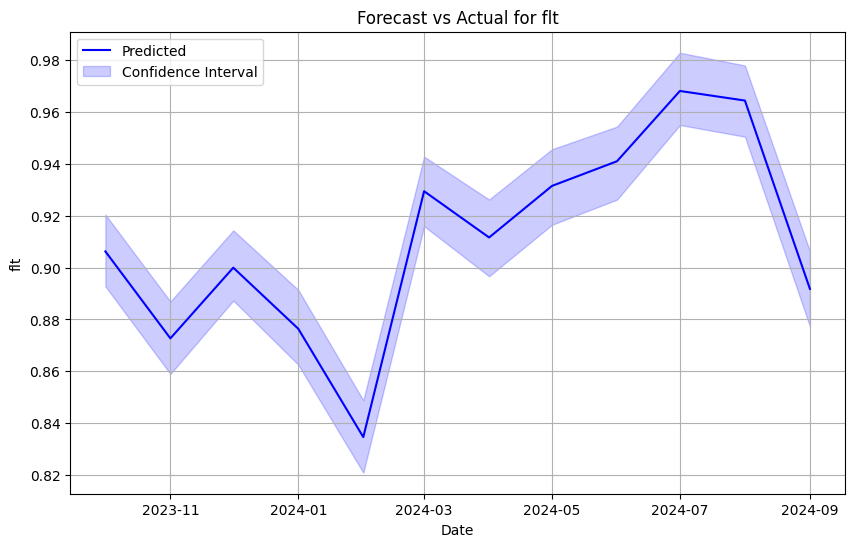

In [156]:
for pair in pairs:
    target_var = pair['target']
    features = pair['features']

    print(f"Training Prophet model for Target Variable: {target_var} with Features: {features}")


    # Prepare the data for Prophet
    train_data_prophet = train_data[['date', target_var] + features]
    train_data_prophet.columns = ['ds', 'y'] + features  # Prophet expects 'ds' for dates and 'y' for target variable

    # Handle missing values by linear interpolation
    for feature in features + ['y']:
        train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')

    # Initialize and train the Prophet model
    prophet_model = Prophet()
    for feature in features:
        prophet_model.add_regressor(feature)

    prophet_model.fit(train_data_prophet)

    # Use the external forecast data as future data
    future_dates_df = external_data[['date', 'transformed_price', 'monthly_real_gdp']]
    future_dates_df = future_dates_df.rename(columns={'date': 'ds'})  # Rename 'date' to 'ds' to match Prophet format

    # Handle missing values in the future data (interpolate)
    for feature in features:
        future_dates_df[feature] = future_dates_df[feature].interpolate(method='linear')  # Linear interpolation

    # Make predictions using the Prophet model
    forecast = prophet_model.predict(future_dates_df)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast['ds'] = forecast['ds'].dt.tz_localize(None)

    # Get forecasted values (yhat) for the next period
    future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Display the future predictions
    print(f"Future Predictions for {target_var}:\n", future_predictions.tail())
    print(future_predictions.dtypes)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')

    plt.title(f"Forecast vs Actual for {target_var}")
    plt.xlabel("Date")
    plt.ylabel(target_var)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

### Prophet for rpm

In [157]:
pairs = [
    {'target': 'rpm', 'features': ['transformed_price', 'monthly_real_gdp']},  # Add features as needed
]


<ipython-input-158-c2204819fe5e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnf0xzwqx/fuyxzicf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnf0xzwqx/xnb7rr6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34375', 'data', 'file=/tmp/tmpnf0xzwqx/fuyxzicf.json', 'in

Training Prophet model for Target Variable: rpm with Features: ['transformed_price', 'monthly_real_gdp']


17:36:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Future Predictions for rpm:
            ds      yhat  yhat_lower  yhat_upper
7  2024-05-01  1.021595    1.015047    1.027219
8  2024-06-01  1.042855    1.036604    1.048385
9  2024-07-01  1.058003    1.051234    1.064641
10 2024-08-01  1.048089    1.041700    1.054224
11 2024-09-01  0.995791    0.989007    1.002254
ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object


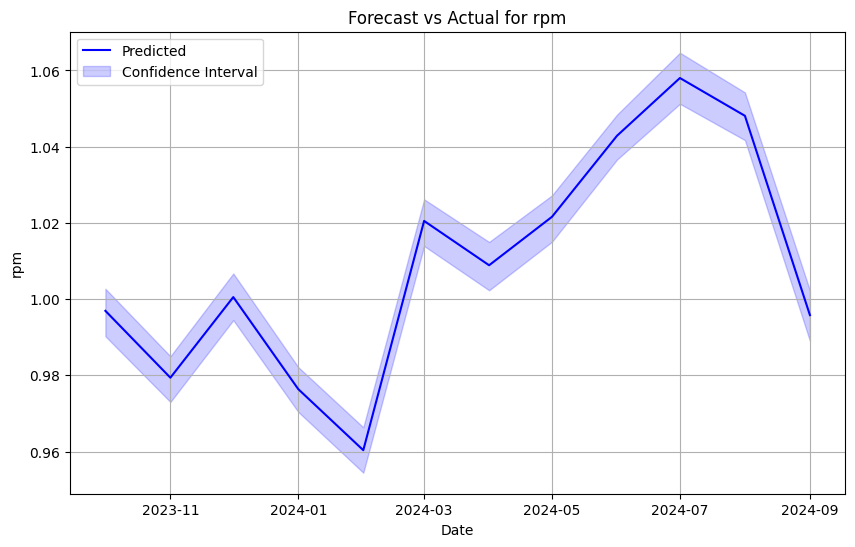

In [158]:
for pair in pairs:
    target_var = pair['target']
    features = pair['features']

    print(f"Training Prophet model for Target Variable: {target_var} with Features: {features}")


    # Prepare the data for Prophet
    train_data_prophet = train_data[['date', target_var] + features]
    train_data_prophet.columns = ['ds', 'y'] + features  # Prophet expects 'ds' for dates and 'y' for target variable

    # Handle missing values by linear interpolation
    for feature in features + ['y']:
        train_data_prophet[feature] = train_data_prophet[feature].interpolate(method='linear')

    # Initialize and train the Prophet model
    prophet_model = Prophet()
    for feature in features:
        prophet_model.add_regressor(feature)

    prophet_model.fit(train_data_prophet)

    # Use the external forecast data as future data
    future_dates_df = external_data[['date', 'transformed_price', 'monthly_real_gdp']]
    future_dates_df = future_dates_df.rename(columns={'date': 'ds'})  # Rename 'date' to 'ds' to match Prophet format

    # Handle missing values in the future data (interpolate)
    for feature in features:
        future_dates_df[feature] = future_dates_df[feature].interpolate(method='linear')  # Linear interpolation

    # Make predictions using the Prophet model
    forecast = prophet_model.predict(future_dates_df)
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    forecast['ds'] = forecast['ds'].dt.tz_localize(None)

    # Get forecasted values (yhat) for the next period
    future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Display the future predictions
    print(f"Future Predictions for {target_var}:\n", future_predictions.tail())
    print(future_predictions.dtypes)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')

    plt.title(f"Forecast vs Actual for {target_var}")
    plt.xlabel("Date")
    plt.ylabel(target_var)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

#### Denormalize flt

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [191]:
file_path = "/content/drive/MyDrive/Time Series Project/air traffic.csv"
original_data = pd.read_csv(file_path)

In [192]:
# Convert Year and Month into a datetime column
original_data['Date'] = pd.to_datetime(original_data['Year'].astype(str) + '-' + original_data['Month'].astype(str) + '-01')

# Set the Date column as the index (important for time series analysis)
original_data.set_index('Date', inplace=True)

# Drop the original Year and Month columns
original_data.drop(columns=['Year', 'Month'], inplace=True)

In [193]:
def clean_numeric_column(column):
    return pd.to_numeric(column.astype(str).str.replace(',', ''), errors='coerce')

object_columns = original_data.select_dtypes(include=['object']).columns

for col in object_columns:
    original_data[col] = clean_numeric_column(air_traffic[col])

In [195]:
original_data["log1p_Flt"] = np.log1p(original_data["Flt"])

In [196]:
scaler = MinMaxScaler()
original_data["scaled_Flt"] = scaler.fit_transform(original_data["log1p_Flt"].values.reshape(-1, 1))

In [197]:
forecast_scaled = np.array([0.8039803, 0.7674924, 0.8039803, 0.8039803, 0.8635982, 0.8655822], dtype=np.float32)


In [198]:
# Inverse transformation: First, undo MinMax scaling, then apply expm1 (inverse of log1p)
forecast_log1p = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()
forecast_denormalized = np.expm1(forecast_log1p)

In [200]:
# Generate future dates for forecasted values
forecast_dates = pd.date_range(start=original_data.index[-1] + pd.DateOffset(months=1), periods=len(forecast_denormalized), freq='MS')


In [201]:
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Flt": forecast_denormalized}, index=forecast_dates)

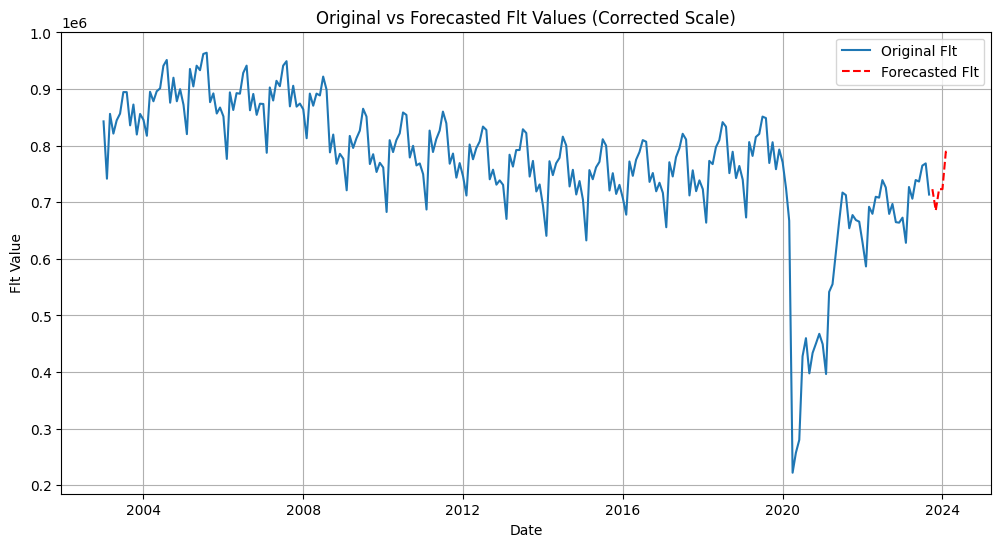

In [213]:
# Plot the original and forecasted Flt values
plt.figure(figsize=(12, 6))
plt.plot(original_data.index, original_data["Flt"], label="Original Flt")
plt.plot(forecast_df.index, forecast_df["Flt"], label="Forecasted Flt", linestyle="dashed", color="red")


plt.xlabel("Date")
plt.ylabel("Flt Value")
plt.title("Original vs Forecasted Flt Values (Corrected Scale)")
plt.legend()
plt.grid(True)
plt.show()